In [1235]:
import json

import pandas as pd

import datetime

import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt

import statistics

import numpy as np
import math
import krippendorff
from scipy.stats import chi2_contingency



# Data preparation

In [1236]:
dataset_name = "DA"

def load_dataset(dataset_name):

    if dataset_name == "DA":
        #### DA dataset

        df = pd.read_json('participant_game_order.jsonl', lines=True)

        def order_games(x):
            list_dates = []
            list_game_id = []
            for elem in x:
                list_dates.append(elem["timestampStr"])
                list_game_id.append(elem["game_id"])
            list_data_initial = list_dates.copy()
            list_dates.sort()

            ordered_list_game_id = []
            for elem in list_dates:
                ordered_list_game_id.append(list_game_id[list_data_initial.index(elem)])
            return ordered_list_game_id

        print(df["game_order"][0])
        print(df["game_order"].apply(lambda x: order_games(x))[0])
        df["game_orderered"] = df["game_order"].apply(lambda x: order_games(x))
        print(df["game_orderered"][0])

        df.to_csv("player_game_order_test.csv")

        ### Run python script

        df = pd.read_csv("total_extracted_knowledge_DA.csv")

        df["knowledge_sign"].replace({"positive":"+", "negative":"-"}, inplace=True)
        df["knowledge_type"].replace({"discriminative":"discr.", "generative":"gen."}, inplace=True)

        df["knowledge category"] = df.apply(lambda x: x["knowledge_type"] + " " + x["knowledge_sign"], axis=1)

    elif dataset_name == "CSQA":
        df = pd.read_json('CSQA_participant_game_order.jsonl', lines=True)

        def order_games(x):
            list_dates = []
            list_game_id = []
            for elem in x:
                list_dates.append(elem["timestampStr"])
                list_game_id.append(elem["game_id"])
            list_data_initial = list_dates.copy()
            list_dates.sort()

            ordered_list_game_id = []
            for elem in list_dates:
                ordered_list_game_id.append(list_game_id[list_data_initial.index(elem)])
            return ordered_list_game_id

        print(df["game_order"][0])
        print(df["game_order"].apply(lambda x: order_games(x))[0])
        df["game_orderered"] = df["game_order"].apply(lambda x: order_games(x))
        print(df["game_orderered"][0])

        df.to_csv("player_game_order_test_CSQA.csv")

        ### Run python script

        df = pd.read_csv("total_extracted_knowledge_CSQA.csv")

        df["knowledge_sign"].replace({"positive":"+", "negative":"-"}, inplace=True)
        df["knowledge_type"].replace({"discriminative":"discr.", "generative":"gen."}, inplace=True)

        df["knowledge category"] = df.apply(lambda x: x["knowledge_type"] + " " + x["knowledge_sign"], axis=1)


    df["game_level"] = df["game_level"].replace({"MEDIUM":"DIFFICULT"})
    
    return df

In [1237]:
df

,knowledge_piece,knowledge_type,knowledge_sign,concept1,concept2,relation,NL_input,game_ID,game_level,round_id,Overall_round_id,asker_id,replier_id,nb_game_session_asker,nb_game_session_replier,turn_time,knowledge category
0,"+ ( california, IsA, us state )",gen.,+,california,NaN,IsA,us state,686,EASY,1,1,188,187,0,0,161.6,gen. +
1,"+ ( mountains, IsA, us state )",gen.,+,mountains,NaN,IsA,us state,686,EASY,1,1,188,187,0,0,161.6,gen. +
2,"+ ( oklahoma, IsA, us state )",gen.,+,oklahoma,NaN,IsA,us state,686,EASY,1,1,188,187,0,0,161.6,gen. +
3,"+ ( fox, IsA, us state )",gen.,+,fox,NaN,IsA,us state,686,EASY,1,1,188,187,0,0,161.6,gen. +
4,"+ ( louisiana, IsA, us state )",gen.,+,louisiana,NaN,IsA,us state,686,EASY,1,1,188,187,0,0,161.6,gen. +
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85918,"- ( table, papers, CapableOf, opened or closed )",discr.,-,table,papers,CapableOf,opened or closed,941,EASY,2,4,4,28,14,29,78.3,discr. -
85919,"- ( papers, desktop, CapableOf, opened or clos...",discr.,-,papers,desktop,CapableOf,opened or closed,941,EASY,2,4,4,28,14,29,78.3,discr. -
85920,"- ( papers, table, CapableOf, opened or closed )",discr.,-,papers,table,CapableOf,opened or closed,941,EASY,2,4,4,28,14,29,78.3,discr. -
85921,"- ( table, papers, HasProperty, derived from w...",discr.,-,table,papers,HasProperty,derived from wood,941,EASY,3,6,4,28,14,29,40.8,discr. -


In [1238]:
### Processing rounds for actual round ID
#
#print(len(list(set(list(df["game_ID"])))))
#print(len(list(set(list(df[df["round_id"] == 1]["game_ID"])))))
#print(len(list(set(list(df[df["round_id"] == 1].groupby(["game_ID"]).first()["asker_id"].reset_index().rename(columns={"asker_id":"first_player"})["game_ID"])))))
# Find the first player of the games
#df["first_player"] = 
#pd.merge(df,df[df["round_id"] == 1].groupby(["game_ID"]).first()["asker_id"].reset_index().rename(columns={"asker_id":"first_player"}),\
        #on="game_ID")


In [1239]:
df["Overall_round_id"].value_counts()

2     25896
1     25627
3     12638
4     10917
5      5629
6      3066
7      1144
8       497
9       384
11       71
10       54
Name: Overall_round_id, dtype: int64

# Efficiency analysis

In [1240]:
df_analysis = df.copy()

In [1241]:
print("Nb games played:", len(list(set(list(df_analysis["game_ID"])))))
print("Nb easy games played:", len(list(set(list(df_analysis[df_analysis["game_level"] == "EASY"]["game_ID"])))))
print("Nb medium games played:", len(list(set(list(df_analysis[df_analysis["game_level"] == "DIFFICULT"]["game_ID"])))))

print("Nb tuples:", len(df_analysis))

print("% generative +:", len(df_analysis[(df_analysis["knowledge_type"] == "gen.") & \
                                         (df_analysis["knowledge_sign"] == "+")]) / len(df_analysis) * 100) 
print("% generative -:", len(df_analysis[(df_analysis["knowledge_type"] == "gen.") & \
                                         (df_analysis["knowledge_sign"] == "-")]) / len(df_analysis)* 100)
print("% discriminative +:", len(df_analysis[(df_analysis["knowledge_type"] == "discr.") & \
                                         (df_analysis["knowledge_sign"] == "+")]) / len(df_analysis)* 100)
print("% discriminative -:", len(df_analysis[(df_analysis["knowledge_type"] == "discr.") & \
                                         (df_analysis["knowledge_sign"] == "-")]) / len(df_analysis)* 100)

print("% overlap:", len(list(set(list(df_analysis["knowledge_piece"])))) / len(df_analysis) * 100)



print("------------Uniqueness")
def uniquenessPerGame(df_analysis):
    pd_games = pd.concat([df_analysis.groupby("game_ID").size().to_frame('nb_tuples'), \
                          df_analysis.groupby('game_ID')['knowledge_piece'].apply(list)], axis=1)
    pd_games["unique_tuples"] = pd_games.apply(lambda x: len(list(set(x["knowledge_piece"]))), axis=1)
    pd_games["percentage_unique_tuples"] =pd_games.apply(lambda x: x["unique_tuples"] / x["nb_tuples"] * 100, axis=1)

    print(statistics.mean(list(pd_games["percentage_unique_tuples"])))
    print(statistics.stdev(list(pd_games["percentage_unique_tuples"])))

print("--All games:")
uniquenessPerGame(df_analysis)
print("--easy games")
uniquenessPerGame(df_analysis[df_analysis["game_level"] == "EASY"])
print("--medium games")
uniquenessPerGame(df_analysis[df_analysis["game_level"] == "DIFFICULT"])

print("----------Game length")
def timePerGame(df_analysis):
    temp_df = (df_analysis[["game_ID", "Overall_round_id", "turn_time"]].drop_duplicates())
    pd_games = pd.concat([temp_df.groupby('game_ID')['turn_time'].apply(list),\
               temp_df.groupby('game_ID')['Overall_round_id'].apply(list)], axis=1)
    pd_games["duration"] = pd_games.apply(lambda x: sum(x["turn_time"]) , axis=1)
    print("Duration game in s")
    print(statistics.mean(list(pd_games["duration"])))
    print(statistics.stdev(list(pd_games["duration"])))
    print("Min duration: ", min(list(pd_games["duration"])), " max duration: ", max(list(pd_games["duration"])))
    
    pd_games["nb_turns"] = pd_games.apply(lambda x: max(x["Overall_round_id"]), axis=1)
    print("Nb turns")
    #print(pd_games)
    print(statistics.mean(list(pd_games["nb_turns"])))
    print(statistics.stdev(list(pd_games["nb_turns"])))
    print("Min nb turns: ", min(list(pd_games["nb_turns"])), " max nb turns: ", max(list(pd_games["nb_turns"])))
    
    print("Duration turn in s")
    print(statistics.mean(list(temp_df["turn_time"])))
    print(statistics.stdev(list(temp_df["turn_time"])))
    print("Min duration: ", min(list(temp_df["turn_time"])), " max duration: ", max(list(temp_df["turn_time"])))
    
    for turn_nb in range(1,13):
        if len(temp_df[temp_df["Overall_round_id"] == turn_nb]) > 5:
            print("turn: ", turn_nb)
            print(statistics.mean(list(temp_df[temp_df["Overall_round_id"] == turn_nb]["turn_time"])))
            print(statistics.stdev(list(temp_df[temp_df["Overall_round_id"] == turn_nb]["turn_time"])))
            print("Min duration: ", min(list(temp_df[temp_df["Overall_round_id"] == turn_nb]["turn_time"])), " max duration: ", max(list(temp_df[temp_df["Overall_round_id"] == turn_nb]["turn_time"])))

    
    
    
print("--All games:")
timePerGame(df_analysis)    
print("--easy games")
timePerGame(df_analysis[df_analysis["game_level"] == "EASY"])
print("--medium games")
timePerGame(df_analysis[df_analysis["game_level"] == "DIFFICULT"])  
    

Nb games played: 242
Nb easy games played: 142
Nb medium games played: 100
Nb tuples: 85923
% generative +: 4.385321741559303
% generative -: 6.655959405514239
% discriminative +: 20.422936815520874
% discriminative -: 68.53578203740558
% overlap: 97.04852018667877
------------Uniqueness
--All games:
98.54497463730617
5.765942256817319
--easy games
98.42100213174149
6.198485032723587
--medium games
98.72101559520802
5.114482008865089
----------Game length
--All games:
Duration game in s
398.7161157024793
198.52972484723836
Min duration:  59.1  max duration:  1244.8
Nb turns
4.789256198347108
1.7191284896614245
Min nb turns:  1  max nb turns:  11
Duration turn in s
89.42474513438368
61.69033753498848
Min duration:  17.2  max duration:  613.6
turn:  1
121.79724770642201
77.52979027113865
Min duration:  28.4  max duration:  503.0
turn:  2
92.47247706422019
59.7975229848712
Min duration:  21.6  max duration:  359.7
turn:  3
82.93767441860466
59.642128403903456
Min duration:  22.1  max dura

### Throughput

In [1242]:
df_analysis = df.copy()

df_analysis["overall_round_id"] = df_analysis["Overall_round_id"]
df_analysis["Overall_round_id"] = df_analysis["Overall_round_id"].apply(lambda x: x if x<=5 else "6 and over")
df_analysis

,knowledge_piece,knowledge_type,knowledge_sign,concept1,concept2,relation,NL_input,game_ID,game_level,round_id,Overall_round_id,asker_id,replier_id,nb_game_session_asker,nb_game_session_replier,turn_time,knowledge category,overall_round_id
0,"+ ( california, IsA, us state )",gen.,+,california,NaN,IsA,us state,686,EASY,1,1,188,187,0,0,161.6,gen. +,1
1,"+ ( mountains, IsA, us state )",gen.,+,mountains,NaN,IsA,us state,686,EASY,1,1,188,187,0,0,161.6,gen. +,1
2,"+ ( oklahoma, IsA, us state )",gen.,+,oklahoma,NaN,IsA,us state,686,EASY,1,1,188,187,0,0,161.6,gen. +,1
3,"+ ( fox, IsA, us state )",gen.,+,fox,NaN,IsA,us state,686,EASY,1,1,188,187,0,0,161.6,gen. +,1
4,"+ ( louisiana, IsA, us state )",gen.,+,louisiana,NaN,IsA,us state,686,EASY,1,1,188,187,0,0,161.6,gen. +,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85918,"- ( table, papers, CapableOf, opened or closed )",discr.,-,table,papers,CapableOf,opened or closed,941,EASY,2,4,4,28,14,29,78.3,discr. -,4
85919,"- ( papers, desktop, CapableOf, opened or clos...",discr.,-,papers,desktop,CapableOf,opened or closed,941,EASY,2,4,4,28,14,29,78.3,discr. -,4
85920,"- ( papers, table, CapableOf, opened or closed )",discr.,-,papers,table,CapableOf,opened or closed,941,EASY,2,4,4,28,14,29,78.3,discr. -,4
85921,"- ( table, papers, HasProperty, derived from w...",discr.,-,table,papers,HasProperty,derived from wood,941,EASY,3,6 and over,4,28,14,29,40.8,discr. -,6


In [1243]:
print("Nb player per round")
for game_diff in ["EASY", "DIFFICULT"]:
    print(df_analysis[df_analysis["game_level"] == game_diff].groupby(["Overall_round_id"])["asker_id"].apply(set).reset_index().apply(lambda x: len(x["asker_id"]), axis=1))

Nb player per round
0    70
1    71
2    72
3    56
4    33
5    27
dtype: int64
0    59
1    61
2    55
3    57
4    59
5    51
dtype: int64


3787
       turn_time  game_ID knowledge category game_level Overall_round_id
0          161.6      686             gen. +       EASY                1
8           94.4      686             gen. +       EASY                3
12          48.8      686             gen. +       EASY                5
14          36.5      686             gen. +       EASY       6 and over
15          92.0      686             gen. +       EASY                2
...          ...      ...                ...        ...              ...
85843      106.7      941           discr. -       EASY                3
85863       62.6      941           discr. -       EASY                5
85871       28.9      941           discr. -       EASY       6 and over
85877       69.9      941           discr. -       EASY                2
85909       78.3      941           discr. -       EASY                4

[3787 rows x 5 columns]
3787


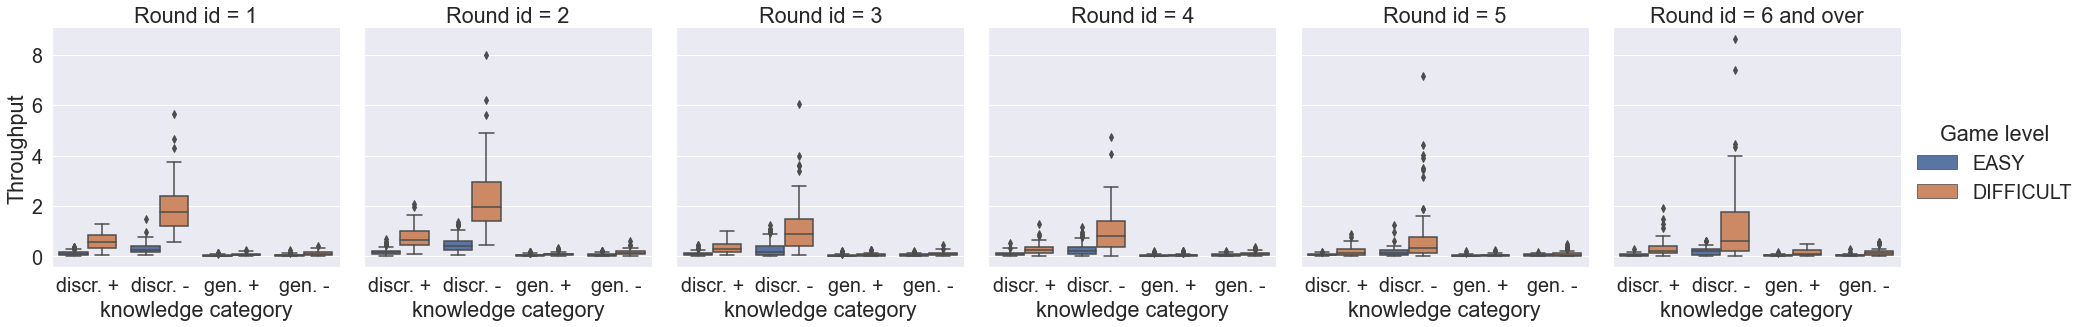

In [1244]:
df_throughput = df_analysis.groupby(["game_ID", "knowledge category", "game_level", "Overall_round_id"]).size().reset_index(name = "Collected knowledge")
print(len(df_throughput))
df_temp = df_analysis[["turn_time", "game_ID","knowledge category", "game_level", "Overall_round_id"]].drop_duplicates(subset=["game_ID","knowledge category", "game_level", "Overall_round_id"])
print(df_temp)
df_throughput = df_throughput.merge(df_temp, on=["game_ID","knowledge category", "game_level", "Overall_round_id"], how='left')
print(len(df_throughput))

df_throughput["turn_throughput"] = df_throughput.apply(lambda x: x["Collected knowledge"] / x["turn_time"], axis=1)

sns.set(font_scale=1.8)

df_throughput.rename(columns={"Overall_round_id": "Round id", \
                             "game_level": "Game level",\
                             "turn_throughput":"Throughput"}, inplace=True)


g = sns.catplot(x="knowledge category", y="Throughput",  hue="Game level", aspect=.9,  kind="box", col="Round id", col_wrap=6, data=df_throughput)



In [1245]:
print("Total s: ", sum(list(df_throughput["turn_time"])))
print("Total tuples: ", sum(list(df_throughput["Collected knowledge"])))
print("Tuple per min: ", sum(list(df_throughput["Collected knowledge"])) * 60 / sum(list(df_throughput["turn_time"])))

print("Verbosity")# 29.47t in 23.58min)
print("Tuple per min: ", 29.47/23.58)

Total s:  347358.30000000185
Total tuples:  85923
Tuple per min:  14.841677887069267
Verbosity
Tuple per min:  1.2497879558948262


In [1246]:
df_throughput

,game_ID,knowledge category,Game level,Round id,Collected knowledge,turn_time,Throughput
0,684,discr. +,EASY,1,7,381.3,0.018358
1,684,discr. +,EASY,2,7,93.2,0.075107
2,684,discr. +,EASY,3,6,107.9,0.055607
3,684,discr. -,EASY,1,42,381.3,0.110149
4,684,discr. -,EASY,2,42,93.2,0.450644
...,...,...,...,...,...,...,...
3782,941,gen. -,EASY,2,2,69.9,0.028612
3783,941,gen. -,EASY,3,1,106.7,0.009372
3784,941,gen. -,EASY,4,3,78.3,0.038314
3785,941,gen. -,EASY,5,3,62.6,0.047923


## Utility

In [1247]:
df_analysis = df.copy()

df_analysis["overall_round_id"] = df_analysis["Overall_round_id"]
df_analysis["Overall_round_id"] = df_analysis["Overall_round_id"].apply(lambda x: x if x<=5 else 6)
df_analysis

#df_analysis=df_analysis[df_analysis[""]]

df_throughput_simple = df_analysis.groupby(["game_ID",  "game_level", "Overall_round_id"]).size().reset_index(name = "Collected knowledge")
print(len(df_throughput))
df_temp = df[["turn_time", "game_ID","game_level", "Overall_round_id"]].drop_duplicates(subset=["game_ID", "game_level", "Overall_round_id"])
print(df_temp)
df_throughput_simple = df_throughput_simple.merge(df_temp, on=["game_ID", "game_level", "Overall_round_id"], how='left')
print(len(df_throughput_simple))

df_throughput_simple["turn_throughput"] = df_throughput_simple.apply(lambda x: x["Collected knowledge"] / x["turn_time"], axis=1)




df_round_game = df_throughput_simple.groupby(["game_ID", "game_level", "Overall_round_id"]).sum().reset_index()#.size().reset_index(name = "Collected knowledge")
df_analysis["list_players"] = df_analysis.apply(lambda x: set([x["asker_id"], x["replier_id"]]), axis=1)
temp =df_analysis[["game_ID", "list_players"]].drop_duplicates(subset=["game_ID"])
df_round_game = df_round_game.merge(temp, on="game_ID", how="left")

df_game_time = df_analysis.groupby(["game_ID"])["turn_time"].sum().reset_index()
df_game_time = df_game_time.merge(df_analysis.groupby(["game_ID"])["Overall_round_id"].max().reset_index(), on="game_ID")


#print(len(set(list(df_analysis["asker_id"]))), len(set(list(df_analysis["replier_id"]))))
df_players = pd.concat([df_analysis[["asker_id", "game_ID"]].rename(columns={"asker_id":"player_id"}),\
                       df_analysis[["replier_id", "game_ID"]].rename(columns={"replier_id":"player_id"})], axis=0)

df_players = df_players.groupby(["player_id"])["game_ID"].apply((set)).reset_index()
df_players["game_ID"] = df_players.apply(lambda x: list(x["game_ID"]), axis=1)
#df_players["total_nb_games"] = df_players.apply(lambda x: len(x["game_ID"]), axis=1)
df_players["total_nb_games"] = df_players.apply(lambda x: len(x["game_ID"]) if len(x["game_ID"]) <20 else 5, axis=1)
df_players["game_time"] = df_players.apply(lambda x: [df_game_time[df_game_time["game_ID"] == elem]["turn_time"].values[0] for elem in x["game_ID"]], axis=1)


#df_players["total_nb_games"].value_counts()
#df_players = df_players[df_players["total_nb_games"] <20]
#df_players["total_nb_games"].value_counts()
df_players["cost_per_game_simple_count"] = df_players.apply(lambda x: 2.5 / x["total_nb_games"], axis=1)
df_players["cost_per_game_time_proportional"] = \
    df_players.apply(lambda x: [2.5 * elem / sum(x["game_time"]) for elem in x["game_time"]], axis=1)
df_players["cost_per_game_time_proportional_dict"] = \
    df_players.apply(lambda x: {id_g: 2.5 * elem / sum(x["game_time"]) for id_g, elem in zip(x["game_ID"],x["game_time"])}, axis=1)

df_round_game["cost_specific_game_simple_count"] = df_round_game.apply(lambda x: \
            df_players[df_players["player_id"] == list(x["list_players"])[0]]["cost_per_game_simple_count"].values[0] + \
             df_players[df_players["player_id"] == list(x["list_players"])[1]]["cost_per_game_simple_count"].values[0]   , axis=1)

df_round_game["cost_specific_game_time_proportional"] = df_round_game.apply(lambda x: \
            df_players[df_players["player_id"] == list(x["list_players"])[0]]["cost_per_game_time_proportional_dict"].values[0][x["game_ID"]] + \
             df_players[df_players["player_id"] == list(x["list_players"])[1]]["cost_per_game_time_proportional_dict"].values[0][x["game_ID"]]   , axis=1)

df_round_game["round_cost_specific_game_time_proportional"] = df_round_game.apply(lambda x: x["cost_specific_game_time_proportional"] / df_game_time[df_game_time["game_ID"] == x["game_ID"]]["Overall_round_id"].values[0], axis=1)

df_round_game["utility"] = df_round_game.apply(lambda x:x["turn_throughput"] / x["round_cost_specific_game_time_proportional"], axis=1)
print(len(df_round_game))
df_round_game = df_round_game[abs(df_round_game["utility"] - statistics.mean(list(df_round_game["utility"])) ) < 5* statistics.stdev(list(df_round_game["utility"]))]
print(len(df_round_game))


df_round_game["Normalized utility"] = df_round_game.apply(lambda x: x["utility"] / max(list(df_round_game["utility"])) * 100 , axis=1)

3787
       turn_time  game_ID game_level  Overall_round_id
0          161.6      686       EASY                 1
8           94.4      686       EASY                 3
12          48.8      686       EASY                 5
14          36.5      686       EASY                 7
15          92.0      686       EASY                 2
...          ...      ...        ...               ...
85733       62.6      941       EASY                 5
85735       28.9      941       EASY                 7
85738       69.9      941       EASY                 2
85744       78.3      941       EASY                 4
85747       40.8      941       EASY                 6

[1079 rows x 4 columns]
1021
1021
1019


In [1248]:
#df_round_game["utility"].value_counts(bins=10)
df_analysis



,knowledge_piece,knowledge_type,knowledge_sign,concept1,concept2,relation,NL_input,game_ID,game_level,round_id,Overall_round_id,asker_id,replier_id,nb_game_session_asker,nb_game_session_replier,turn_time,knowledge category,overall_round_id,list_players
0,"+ ( california, IsA, us state )",gen.,+,california,NaN,IsA,us state,686,EASY,1,1,188,187,0,0,161.6,gen. +,1,"{187, 188}"
1,"+ ( mountains, IsA, us state )",gen.,+,mountains,NaN,IsA,us state,686,EASY,1,1,188,187,0,0,161.6,gen. +,1,"{187, 188}"
2,"+ ( oklahoma, IsA, us state )",gen.,+,oklahoma,NaN,IsA,us state,686,EASY,1,1,188,187,0,0,161.6,gen. +,1,"{187, 188}"
3,"+ ( fox, IsA, us state )",gen.,+,fox,NaN,IsA,us state,686,EASY,1,1,188,187,0,0,161.6,gen. +,1,"{187, 188}"
4,"+ ( louisiana, IsA, us state )",gen.,+,louisiana,NaN,IsA,us state,686,EASY,1,1,188,187,0,0,161.6,gen. +,1,"{187, 188}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85918,"- ( table, papers, CapableOf, opened or closed )",discr.,-,table,papers,CapableOf,opened or closed,941,EASY,2,4,4,28,14,29,78.3,discr. -,4,"{4, 28}"
85919,"- ( papers, desktop, CapableOf, opened or clos...",discr.,-,papers,desktop,CapableOf,opened or closed,941,EASY,2,4,4,28,14,29,78.3,discr. -,4,"{4, 28}"
85920,"- ( papers, table, CapableOf, opened or closed )",discr.,-,papers,table,CapableOf,opened or closed,941,EASY,2,4,4,28,14,29,78.3,discr. -,4,"{4, 28}"
85921,"- ( table, papers, HasProperty, derived from w...",discr.,-,table,papers,HasProperty,derived from wood,941,EASY,3,6,4,28,14,29,40.8,discr. -,6,"{4, 28}"


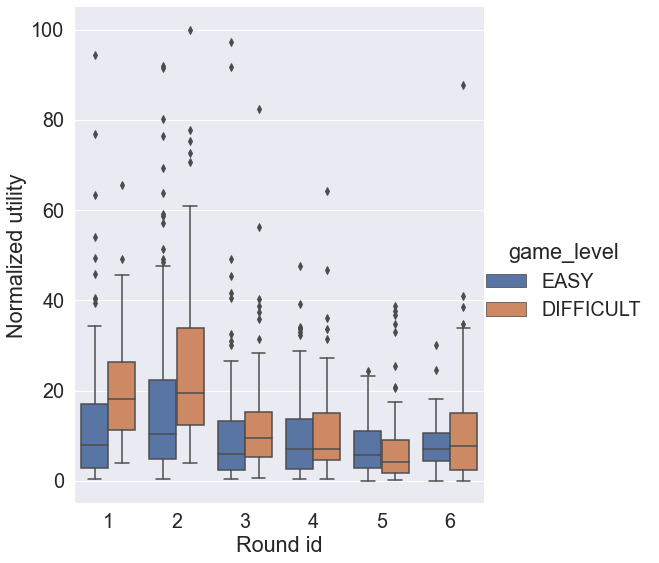

In [1249]:
sns.set(font_scale=1.8)

df_round_game.rename(columns={"Overall_round_id": "Round id"}, inplace=True)
g = sns.catplot(x="Round id", y="Normalized utility",  hue="game_level", aspect=.9,  kind="box",data=df_round_game,\
               height=8.27)#col="Overall_round_id", col_wrap=6,
                




# Qualitative analysis

In [1250]:
# Only DA dataset can work here

In [1251]:
### Merge qualitative analysis data


# Load data

list_sheets = ['agathe', 'andrea', 'gaole', 'jie', 'ujwal', 'common_data'] #

list_df = []
for sheet_name in list_sheets:
    pd_df = pd.read_excel('qualitative_analysis (2).xlsx',
    sheet_name=sheet_name,
    header=0,
    index_col=False,
    keep_default_na=True)
    
    pd_df.rename( columns={'Unnamed: 0':'tuple'}, inplace=True )
    pd_df = pd_df[pd_df["tuple"].notna()]
    pd_df["Noise"].replace({"Useful":"Meaningful"}, inplace=True)
    pd_df["Bias"].replace({1.0:"Unbiased", 3.0:"Benign bias", 5.0:"Malignent bias"}, inplace=True)
    pd_df["Typicality"].replace({1.0:"Low", 3.0:"Medium", 5.0:"High"}, inplace=True)
    pd_df["Specificity"].replace({1.0:"Low", 3.0:"Medium", 5.0:"High"}, inplace=True)
    pd_df["Tacitness"].replace({1.0:"Low", 3.0:"Medium", 5.0:"High"}, inplace=True)
    
    
    # Basic preprocessing
    pd_df["Sensible - sign"] = pd_df.apply(lambda x: x["Sensible - sign"] if not pd.isnull(x["Sensible - sign"]) else "Not Flip", axis=1)
    pd_df["Sensible - relation"] = pd_df.apply(lambda x: x["Sensible - relation"] if not pd.isnull(x["Sensible - relation"]) else "Correct", axis=1)
    pd_df["Meanings"] = pd_df.apply(lambda x: x["Meanings"] if not pd.isnull(x["Meanings"]) else "a single interpretation", axis=1)
    
    pd_df["Correctness"] = pd_df.apply(lambda x: "Incorrect" if (x["Sensible - sign"] == "Flip") else x["Correctness"], axis=1)
    pd_df["Correctness"] = pd_df.apply(lambda x: "Incorrect" if (x["Sensible - relation"] == "Incorrect") else x["Correctness"], axis=1)
    
        
    pd_df["Specificity"] = pd_df.apply(lambda x: "High" if ((x["tuple"][0] == "-") & (x["Specificity"] == "Low")) else x["Specificity"], axis=1)


    
    
    if sheet_name == "common_data":
        pd_df.dropna(subset=["Noise"], inplace=True)
    list_df.append(pd_df)
    
print(len(list_df))
    
# Aggregate data

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

list_to_aggregate = [df_int[df_int["tuple"].isin(intersection_tuple)] for df_int in list_df[:-1]]
print(len(list_to_aggregate))

intersection_tuple = (intersection(list(list_df[0]["tuple"]), list(list_df[1]["tuple"])))
list_to_merge = [int_df[~int_df["tuple"].isin(intersection_tuple)] for int_df in list_df]
# Adding Agathe's overlapping annotations
list_to_merge.append(list_to_aggregate[0])
common_df = pd.concat(list_to_merge)



from functools import reduce

df_final = reduce(lambda left,right: pd.merge(left,right,on='tuple'), list_to_aggregate)

print("WE NEED TO HHANDLE THE DATA WITH DISAGREEMENT!")



6
5
WE NEED TO HHANDLE THE DATA WITH DISAGREEMENT!


/var/folders/j5/fy2cymnx1js4drkm7csc5g740000gn/T/ipykernel_12117/179203589.py:64: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Remarks_x', 'Sensible - relation_x', 'Meanings_x', 'Sensible - sign_x', 'Bias_x', 'Specificity_x', 'Typicality_x', 'Noise_x', 'Correctness_x', 'Tacitness_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = reduce(lambda left,right: pd.merge(left,right,on='tuple'), list_to_aggregate)


In [1252]:
#original_df = pd.read_csv("full_data_to_be_analysed_qualitatively.csv")
#original_df.rename(columns={"knowledge_piece": "tuple"}, inplace=True)
df_analysis.rename(columns={"knowledge_piece": "tuple"}, inplace=True)
common_df = df_analysis.merge(common_df, on="tuple")

In [1253]:
common_df

,tuple,knowledge_type,knowledge_sign,concept1,concept2,relation,NL_input,game_ID,game_level,round_id,Overall_round_id,asker_id,replier_id,nb_game_session_asker,nb_game_session_replier,turn_time,knowledge category,overall_round_id,list_players,Noise,Correctness,Sensible - sign,Sensible - relation,Meanings,Bias,Typicality,Specificity,Tacitness,Remarks
0,"+ ( closet, UsedFor, storage )",gen.,+,closet,NaN,UsedFor,storage,722,EASY,1,2,227,209,0,1,47.7,gen. +,2,"{209, 227}",Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,Low,Low,NaN
1,"+ ( closet, UsedFor, storage )",gen.,+,closet,NaN,UsedFor,storage,750,EASY,2,3,251,229,0,1,92.1,gen. +,3,"{251, 229}",Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,Low,Low,NaN
2,"+ ( closet, UsedFor, storage )",gen.,+,closet,NaN,UsedFor,storage,900,EASY,2,4,283,284,0,0,25.5,gen. +,4,"{283, 284}",Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,Low,Low,NaN
3,"+ ( closet, UsedFor, storage )",gen.,+,closet,NaN,UsedFor,storage,902,DIFFICULT,3,5,273,28,4,16,91.9,gen. +,5,"{273, 28}",Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,Low,Low,NaN
4,"+ ( closet, UsedFor, storage )",gen.,+,closet,NaN,UsedFor,storage,902,DIFFICULT,2,4,28,273,16,4,108.0,gen. +,4,"{273, 28}",Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,Low,Low,NaN
5,"+ ( closet, UsedFor, storage )",gen.,+,closet,NaN,UsedFor,storage,911,DIFFICULT,1,1,283,284,3,3,58.9,gen. +,1,"{283, 284}",Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,Low,Low,NaN
6,"+ ( door, MadeOf, wood )",gen.,+,door,NaN,MadeOf,wood,722,EASY,2,4,227,209,0,1,157.5,gen. +,4,"{209, 227}",Meaningful,Correct,Not Flip,Correct,a single interpretation,Benign bias,Medium,Low,Medium,NaN
7,"+ ( door, MadeOf, wood )",gen.,+,door,NaN,MadeOf,wood,837,DIFFICULT,1,2,257,241,4,4,28.9,gen. +,2,"{257, 241}",Meaningful,Correct,Not Flip,Correct,a single interpretation,Benign bias,Medium,Low,Medium,NaN
8,"- ( door, UsedFor, storage )",gen.,-,door,NaN,UsedFor,storage,722,EASY,1,2,227,209,0,1,47.7,gen. -,2,"{209, 227}",Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,High,High,NaN
9,"+ ( microwave, UsedFor, cooking food )",gen.,+,microwave,NaN,UsedFor,cooking food,706,EASY,2,3,205,210,3,1,85.5,gen. +,3,"{210, 205}",Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,Low,Low,NaN


## Study of annotator disagreement



In [1254]:


def fleiss_kappa(M):
    """Computes Fleiss' kappa for group of annotators.
    :param M: a matrix of shape (:attr:'N', :attr:'k') with 'N' = number of subjects and 'k' = the number of categories.
        'M[i, j]' represent the number of raters who assigned the 'i'th subject to the 'j'th category.
    :type: numpy matrix
    :rtype: float
    :return: Fleiss' kappa score
    """
    N, k = M.shape  # N is # of items, k is # of categories
    n_annotators = float(np.sum(M[0, :]))  # # of annotators
    tot_annotations = N * n_annotators  # the total # of annotations
    category_sum = np.sum(M, axis=0)  # the sum of each category over all items

    # chance agreement
    p = category_sum / tot_annotations  # the distribution of each category over all annotations
    PbarE = np.sum(p * p)  # average chance agreement over all categories

    # observed agreement
    P = (np.sum(M * M, axis=1) - n_annotators) / (n_annotators * (n_annotators - 1))
    Pbar = np.sum(P) / N  # add all observed agreement chances per item and divide by amount of items

    return round((Pbar - PbarE) / (1 - PbarE), 4)


def prepare_data(nb_cat, list_df, name_column, str_type="inttt", remove_noise=True, reduce_to_2=False):
    
    # list_df are not necessarily in the same order
    
    temp_list_df = []
    for df in list_df:
        base_idx = list_df[0]["tuple"]
        temp_list_df.append(pd.merge(base_idx, df, on="tuple"))
        
        
    list_df = temp_list_df
    
    
    list_results = []
    list_judgements = []
    
    list_idx_noise = []
    if remove_noise:
        for df in list_df:
            list_idx_noise.append(df[df["Noise"] == "Noise"].index)        
    
    list_list = []
    for df in list_df:
        temp_df = df[name_column]
        for list_idx in list_idx_noise:
            temp_df = temp_df.drop(list_idx, errors='ignore')
            
        if reduce_to_2 =="low":
            temp_df.replace({"Medium":"Low"}, inplace=True)
        elif reduce_to_2 == "high":
            temp_df.replace({"Medium":"High"}, inplace=True)
            
        list_results.append(temp_df)
        list_list.append(list(temp_df))
        list_judgements += list(temp_df)
    if str_type != "inttt":
        list_judgements = [x for x in list_judgements if ((not isinstance(x, str) and math.isnan(x) == False) or (isinstance(x, str)))]
    list_cat = list(set(list_judgements))
    if nb_cat != len(list_cat):
        print("You entered ", str(nb_cat), " categories, but we found ", str(len(list_cat)), " of them...")
        list_cat = list_cat + ["others"] * (nb_cat - len(list_cat))
    
    new_df = pd.DataFrame(0, index=np.arange(len(list_df[0])), columns=list_cat)
    for list_item in list_results:
        for index, item in enumerate(list_item):
            #print(index, item)
            if str_type != "inttt":
                if isinstance(item, str):
                    new_df.at[index, item] += 1
            else:
                new_df.at[index, item] += 1
    return new_df, list_results, list_list
            
    #return fleiss_kappa(new_df.to_numpy())

#list_to_aggregate = [df_int[df_int["tuple"].isin(intersection_tuple)] for df_int in list_df[:-2]]


         
df1, res, res_list = prepare_data(2, list_to_aggregate, "Noise", "strrr", False)
print("Noise", fleiss_kappa(df1.to_numpy()))
print("kripp", krippendorff.alpha(value_counts=df1.to_numpy(),level_of_measurement='nominal'))
#print("kripp", krippendorff.alpha(res_list))

         
df1, res, res_list = prepare_data(2, list_to_aggregate, "Correctness", "strrr")
print("Correctness", fleiss_kappa(df1.to_numpy()))
print("kripp", krippendorff.alpha(value_counts=df1.to_numpy(),level_of_measurement='nominal'))


         
df1, res, res_list = prepare_data(2, list_to_aggregate, "Sensible - sign", "strrr")
print("Sensible - sign", fleiss_kappa(df1.to_numpy()))
print("kripp", krippendorff.alpha(value_counts=df1.to_numpy(),level_of_measurement='nominal'))


         
df1, res, res_list = prepare_data(2, list_to_aggregate, "Sensible - relation", "strrr")
print("Sensible - relation", fleiss_kappa(df1.to_numpy()))
print("kripp", krippendorff.alpha(value_counts=df1.to_numpy(),level_of_measurement='nominal'))


         
df1, res, res_list = prepare_data(2, list_to_aggregate, "Meanings", "strrr")
print("Meanings", fleiss_kappa(df1.to_numpy()))
print("kripp", krippendorff.alpha(value_counts=df1.to_numpy(),level_of_measurement='nominal'))


print("-----")


df1, res, res_list = prepare_data(3, list_to_aggregate, "Bias", "strrr")
print("Bias", fleiss_kappa(df1.to_numpy()))
print("kripp", krippendorff.alpha(value_counts=df1.to_numpy(),level_of_measurement='nominal'))


print("-----")


df1, res, res_list = prepare_data(3, list_to_aggregate, "Typicality", "strrr")
print("Typicality", fleiss_kappa(df1.to_numpy()))
print("kripp", krippendorff.alpha(value_counts=df1.to_numpy(),level_of_measurement='nominal'))
df1, res, res_list = prepare_data(2, list_to_aggregate, "Typicality", "strrr", True, "low")
print("Typicality", fleiss_kappa(df1.to_numpy()))
print("kripp", krippendorff.alpha(value_counts=df1.to_numpy(),level_of_measurement='nominal'))
df1, res, res_list = prepare_data(2, list_to_aggregate, "Typicality", "strrr", True, "high")
print("Typicality", fleiss_kappa(df1.to_numpy()))
print("kripp", krippendorff.alpha(value_counts=df1.to_numpy(),level_of_measurement='nominal'))

print("-----")
df1, res, res_list = prepare_data(3, list_to_aggregate, "Specificity", "strrr")
print("Specificity", fleiss_kappa(df1.to_numpy()))
print("kripp", krippendorff.alpha(value_counts=df1.to_numpy(),level_of_measurement='nominal'))
df1, res, res_list = prepare_data(2, list_to_aggregate, "Specificity", "strrr", True, "low")
print("Specificity", fleiss_kappa(df1.to_numpy()))
print("kripp", krippendorff.alpha(value_counts=df1.to_numpy(),level_of_measurement='nominal'))
df1, res, res_list = prepare_data(2, list_to_aggregate, "Specificity", "strrr", True, "high")
print("Specificity", fleiss_kappa(df1.to_numpy()))
print("kripp", krippendorff.alpha(value_counts=df1.to_numpy(),level_of_measurement='nominal'))

print("-----")


df1, res, res_list = prepare_data(3, list_to_aggregate, "Tacitness", "strrr")
print("Tacitness", fleiss_kappa(df1.to_numpy()))
print("kripp", krippendorff.alpha(value_counts=df1.to_numpy(),level_of_measurement='nominal'))
df1, res, res_list = prepare_data(2, list_to_aggregate, "Tacitness", "strrr", True, "low")
print("Tacitness", fleiss_kappa(df1.to_numpy()))
print("kripp", krippendorff.alpha(value_counts=df1.to_numpy(),level_of_measurement='nominal'))
df1, res, res_list = prepare_data(2, list_to_aggregate, "Tacitness", "strrr", True, "high")
print("Tacitness", fleiss_kappa(df1.to_numpy()))
print("kripp", krippendorff.alpha(value_counts=df1.to_numpy(),level_of_measurement='nominal'))



Noise 0.9098
kripp 0.9100227790432802
Correctness 0.3241
kripp 0.36857142857142866
Sensible - sign 0.3309
kripp 0.3768451633165829
Sensible - relation 0.3529
kripp 0.4460431654676259
Meanings 0.3027
kripp 0.07252358490566035
-----
Bias 0.2822
kripp 0.30514208389715847
-----
Typicality 0.2696
kripp 0.23015969029760464
Typicality 0.2726
kripp 0.2369633761823915
Typicality 0.3346
kripp 0.0
-----
Specificity 0.3329
kripp 0.39298337844790954
Specificity 0.422
kripp 0.5137266136867542
Specificity 0.3702
kripp 0.4484285714285715
-----
Tacitness 0.2787
kripp 0.3275451036554482
Tacitness 0.3642
kripp 0.4338287791263712
Tacitness 0.3228
kripp 0.37816255534471854


In [1255]:
"""

# Compute disagreement DA correctness and overlap

df1 = pd.read_csv("candidate_correctness/agathe.csv").rename(columns={"correctness": "correctness_1"})
df2 = pd.read_csv("candidate_correctness/andy.csv").rename(columns={"correctness": "correctness_2"})
df3 = pd.read_csv("candidate_correctness/gaole.csv").rename(columns={"correctness": "correctness_3"})
df4 = pd.read_csv("candidate_correctness/ujwal.csv").rename(columns={"correctness": "correctness_4"})
df5 = pd.read_csv("candidate_correctness/peide.csv").rename(columns={"correctness": "correctness_5"})

print(len(df1), len(df2))

a = pd.merge(df1, df2, on="candidate_id")
a = pd.merge(a, df3, on="candidate_id")
a = pd.merge(a, df4, on="candidate_id")
a = pd.merge(a, df5, on="candidate_id")


list_results = [df1[df1["candidate_statement"].isin(list(a["candidate_statement_x"]))]["correctness_1"], df2["correctness_2"], df3["correctness_3"], df4["correctness_4"], df5["correctness_5"]]

new_df = pd.DataFrame(0, index=np.arange(len(a)), columns=["Yes", "No", "Not Sure"])
for list_item in list_results:
    for index, item in enumerate(list_item))]):
        #print(index, item)
        new_df.at[index, item] += 1
        print(new_df)
        
"""

'\n\n# Compute disagreement DA correctness and overlap\n\ndf1 = pd.read_csv("candidate_correctness/agathe.csv").rename(columns={"correctness": "correctness_1"})\ndf2 = pd.read_csv("candidate_correctness/andy.csv").rename(columns={"correctness": "correctness_2"})\ndf3 = pd.read_csv("candidate_correctness/gaole.csv").rename(columns={"correctness": "correctness_3"})\ndf4 = pd.read_csv("candidate_correctness/ujwal.csv").rename(columns={"correctness": "correctness_4"})\ndf5 = pd.read_csv("candidate_correctness/peide.csv").rename(columns={"correctness": "correctness_5"})\n\nprint(len(df1), len(df2))\n\na = pd.merge(df1, df2, on="candidate_id")\na = pd.merge(a, df3, on="candidate_id")\na = pd.merge(a, df4, on="candidate_id")\na = pd.merge(a, df5, on="candidate_id")\n\n\nlist_results = [df1[df1["candidate_statement"].isin(list(a["candidate_statement_x"]))]["correctness_1"], df2["correctness_2"], df3["correctness_3"], df4["correctness_4"], df5["correctness_5"]]\n\nnew_df = pd.DataFrame(0, index

In [1256]:
df1

,High,Low
0,3,2
1,2,3
2,5,0
3,0,5
4,4,1
...,...,...
90,0,0
91,0,0
92,0,0
93,0,0


In [1257]:
a

<AxesSubplot:title={'center':'Psychosocial consequences'}>

In [1258]:
#from functools import reduce

#temp_list_df = []
#for df in list_to_aggregate:
#    base_idx = list_df[0]["tuple"]
#    temp_list_df.append(pd.merge(base_idx, df, on="tuple")[["tuple", "Noise", "Correctness", "Tacitness", "Typicality", "Specificity", "Bias"]])
        
#df = reduce(lambda df1,df2: pd.merge(df1,df2,on='tuple'), temp_list_df)
#df.columns
#pd.set_option("display.max_columns", None) 
#df.head()

## Study of correlation between rounds and knowledge types

In [1259]:

def computeCorrelation(df, col1, col2, prob):
    # Cross tabulation between GENDER and APPROVE_LOAN
    CrosstabResult=pd.crosstab(index=df[col1],columns=df[col2])

    # Performing Chi-sq test
    ChiSqResult = chi2_contingency(CrosstabResult)

    # P-Value is the Probability of H0 being True
    # If P-Value>0.05 then only we Accept the assumption(H0)
    
    print(ChiSqResult[0], '. The P-Value of the ChiSq Test is:', ChiSqResult[1], '. dof ', ChiSqResult[2])
    #return ChiSqResult
    
    alpha = 1.0 - prob
    if ChiSqResult[1] <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    return ChiSqResult[1]

#print("amount negative knowledge: ", len(df[df["knowledge_sign"] == "negative"]), " amount positive knowledge: ", len(df[df["knowledge_sign"] == "positive"]))
        
prob = 0.95
print("Proba: ", prob)
for k_sign in ["all", "+", "-"]:
    df_temp = common_df.copy()
    if k_sign != "all":
        df_temp = df_temp[df_temp["knowledge_sign"] == k_sign]
    for k_type in ["all"]: #, "discriminative", "generative"]:
        df_temp2 = df_temp.copy()
        if k_type != "all":
            df_temp2 = df_temp2[df_temp2["knowledge_type"] == k_type]
        
        
        for g_difficulty in ["all", "EASY", "DIFFICULT"]:
            df_temp3 = df_temp2.copy()
            if g_difficulty != "all":
                df_temp3 = df_temp3[df_temp3["game_level"] == g_difficulty]
                
            print("=================== " + k_sign + "   " + g_difficulty)
            print("sample size ", len(df_temp3))
            print("amount negative knowledge: ", len(df_temp3[df_temp3["knowledge_sign"] == "-"]), " amount positive knowledge: ", len(df_temp3[df_temp3["knowledge_sign"] == "+"]))

            print("Noise")
            (computeCorrelation(df_temp3, "Overall_round_id", "Noise", prob))
            print("Correctness")
            (computeCorrelation(df_temp3, "Overall_round_id", "Correctness", prob))
            #df_temp3 = df_temp2.copy()
            #df_temp3["knowledge_sign"] = df_temp3.apply(lambda x: new_sign(x), axis=1)
            #print("Knowledge sign")
            #(computeCorrelation(df_temp3, "round_id", "knowledge_sign", prob))
            print("Bias")
            (computeCorrelation(df_temp3, "Overall_round_id", "Bias", prob))
            print("Typicality")
            (computeCorrelation(df_temp3, "Overall_round_id", "Typicality", prob))
            print("Specificity")
            (computeCorrelation(df_temp3, "Overall_round_id", "Specificity", prob))
            print("Tacitness")
            (computeCorrelation(df_temp3, "Overall_round_id", "Tacitness", prob))
            print("Relation")
            (computeCorrelation(df_temp3, "Overall_round_id", "relation", prob))
            
            print("Latex output")
            print("{:.2e}".format( (computeCorrelation(df_temp3, "Overall_round_id", "Correctness", prob))) + " & " + \
                 "{:.2e}".format((computeCorrelation(df_temp3, "Overall_round_id", "Bias", prob))) + " & " + \
                 "{:.2e}".format((computeCorrelation(df_temp3, "Overall_round_id", "Typicality", prob))) + " & " + \
                  "{:.2e}".format((computeCorrelation(df_temp3, "Overall_round_id", "Specificity", prob))) + " & " + \
                  "{:.2e}".format((computeCorrelation(df_temp3, "Overall_round_id", "Tacitness", prob))) 
                 )

Proba:  0.95
=================== all   all
sample size  27
amount negative knowledge:  2  amount positive knowledge:  25
Noise
0.0 . The P-Value of the ChiSq Test is: 1.0 . dof  0
Independent (fail to reject H0)
Correctness
0.0 . The P-Value of the ChiSq Test is: 1.0 . dof  0
Independent (fail to reject H0)
Bias
4.672073039742212 . The P-Value of the ChiSq Test is: 0.9119806228021362 . dof  10
Independent (fail to reject H0)
Typicality
2.2108441558441556 . The P-Value of the ChiSq Test is: 0.8192680624577576 . dof  5
Independent (fail to reject H0)
Specificity
8.250470957613814 . The P-Value of the ChiSq Test is: 0.14296123166298821 . dof  5
Independent (fail to reject H0)
Tacitness
6.0281954887218046 . The P-Value of the ChiSq Test is: 0.8128888416743154 . dof  10
Independent (fail to reject H0)
Relation
17.658367346938782 . The P-Value of the ChiSq Test is: 0.6099019872211595 . dof  20
Independent (fail to reject H0)
Latex output
0.0 . The P-Value of the ChiSq Test is: 1.0 . dof  0
I

13.595555555555555 . The P-Value of the ChiSq Test is: 0.8503961420254442 . dof  20
Independent (fail to reject H0)
Latex output
0.0 . The P-Value of the ChiSq Test is: 1.0 . dof  0
Independent (fail to reject H0)
4.750000000000001 . The P-Value of the ChiSq Test is: 0.9072404147677419 . dof  10
Independent (fail to reject H0)
3.3566666666666674 . The P-Value of the ChiSq Test is: 0.6451778394212095 . dof  5
Independent (fail to reject H0)
4.983901515151514 . The P-Value of the ChiSq Test is: 0.41784803170569373 . dof  5
Independent (fail to reject H0)
8.106666666666667 . The P-Value of the ChiSq Test is: 0.618418598337151 . dof  10
Independent (fail to reject H0)
1.00e+00 & 9.07e-01 & 6.45e-01 & 4.18e-01 & 6.18e-01
=================== -   all
sample size  2
amount negative knowledge:  2  amount positive knowledge:  0
Noise
0.0 . The P-Value of the ChiSq Test is: 1.0 . dof  0
Independent (fail to reject H0)
Correctness
0.0 . The P-Value of the ChiSq Test is: 1.0 . dof  0
Independent (f

ValueError: No data; `observed` has size 0.

In [ ]:
common_df

In [ ]:
def create_sub_df(df, column, values_to_keep=[]):
    df_int = df.groupby(["Overall_round_id", "game_level", column]).agg({"Nb_tuple":"sum"})

    df_int = df_int.reset_index()


    df_int["round_level"]  = df_int["Overall_round_id"].astype(str) + "_" + df_int["game_level"]


    df_int["percentage"] = df_int.groupby("round_level")["Nb_tuple"].apply(
         lambda x:  100*x / x.sum()
    )

    if values_to_keep != []:
        df_int = df_int[df_int[column].isin(values_to_keep)]

    df_int["judgement"] = df_int[column]
    df_int["category"] = column
    
    return df_int

common_df["Nb_tuple"] = 1
df_int_noise = create_sub_df(common_df, "Noise") #, ["Useful"])
df_int_correct = create_sub_df(common_df, "Correctness")
df_int_bias = create_sub_df(common_df, "Bias")
df_int_typical = create_sub_df(common_df, "Typicality")
df_int_specific = create_sub_df(common_df, "Specificity")
df_int_tacit = create_sub_df(common_df, "Tacitness")

df_to_plot = pd.concat([df_int_noise,df_int_correct,\
    df_int_bias,df_int_typical,df_int_specific,df_int_tacit])

In [ ]:
## import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 2*(len(list(set(list(df_to_plot["category"]))))-1), figsize=(35,5), sharex=True, sharey=True)  
#fig, ax = plt.subplots( figsize=(10,7))  

list_categories = [ "Correctness", "Bias", "Typicality", "Specificity", "Tacitness"] # "Noise",

            
plt.setp(ax[ 0], ylabel='Percentage')
for i1, game_level in enumerate(["EASY", "DIFFICULT"]):

    df1 = df_to_plot[df_to_plot["game_level"] == game_level]
    for index, cat in enumerate(list_categories):
        df_temp = df1[df1["category"] == cat]
        months = df_temp['judgement'].drop_duplicates()
        margin_bottom = np.zeros(len(df_temp['Overall_round_id'].drop_duplicates()))
        colors1 = ["#ff6361", "#ffa600", "#58508d"]
        colors2 = ["#488f31", "#9fa200", "#ffa600"]
        colors = [colors1, colors2]

        pivot_df = df_temp.pivot(index='Overall_round_id', columns='judgement', values='percentage')
        pivot_df.loc[:,months].plot.bar(stacked=True, color=colors[i1], ax=ax[index*2 + i1]).legend(loc='lower right',prop = {'size' : 20})
        ax[index*2 + i1].set_title(game_level + "\n" + cat)
        ax[index*2 + i1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),
          fancybox=True, shadow=True,prop = {'size' : 15})

        for item in ([ax[index*2 + i1].title,  ax[index*2 + i1].xaxis.label, ax[index*2 + i1].yaxis.label] +
                     ax[index*2 + i1].get_xticklabels() + ax[index*2 + i1].get_yticklabels()):
            item.set_fontsize(20)
plt.setp(ax[:], xlabel='Round id')



plt.subplots_adjust(hspace = 0.3 )
plt.show()

In [ ]:
def create_sub_df(df, column, values_to_keep=[]):
    df_int = df.groupby(["Overall_round_id", column]).agg({"Nb_tuple":"sum"})

    df_int = df_int.reset_index()


    df_int["round_level"]  = df_int["Overall_round_id"].astype(str) 


    df_int["percentage"] = df_int.groupby("round_level")["Nb_tuple"].apply(
         lambda x:  100*x / x.sum()
    )

    if values_to_keep != []:
        df_int = df_int[df_int[column].isin(values_to_keep)]

    df_int["judgement"] = df_int[column]
    df_int["category"] = column
    
    return df_int


df_analysis = df.copy()

common_df = pd.concat(list_to_merge)
df_analysis.rename(columns={"knowledge_piece": "tuple"}, inplace=True)
common_df = df_analysis.merge(common_df, on="tuple")

common_df["Overall_round_id"] = common_df["Overall_round_id"].apply(lambda x: x if x < 6 else "6+")
common_df["Bias"] = common_df["Bias"].apply(lambda x: "Unbiased" if x == "Unbiased" else "Biased")


common_df["Nb_tuple"] = 1
df_int_noise = create_sub_df(common_df, "Noise") #, ["Useful"])
df_int_correct = create_sub_df(common_df, "Correctness")
df_int_bias = create_sub_df(common_df, "Bias")
df_int_typical = create_sub_df(common_df, "Typicality")
df_int_specific = create_sub_df(common_df, "Specificity")
df_int_tacit = create_sub_df(common_df, "Tacitness")

df_to_plot = pd.concat([df_int_noise,df_int_correct,\
    df_int_bias,df_int_typical,df_int_specific,df_int_tacit])



## import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 35})
fig, ax = plt.subplots(1, (len(list(set(list(df_to_plot["category"]))))-1), figsize=(35,5), sharex=True, sharey=True)  
#fig, ax = plt.subplots( figsize=(10,7))  

list_categories = [ "Correctness", "Bias", "Typicality", "Specificity", "Tacitness"] # "Noise",

#df_to_plot["Overall_round_id"] = df_to_plot["Overall_round_id"].apply(lambda x: x if x < 6 else "6+")


            
plt.setp(ax[ 0], ylabel='Percentage')
for i1, game_level in enumerate(["EASY"]):

    df1 = df_to_plot.copy() #[df_to_plot["game_level"] == game_level]
    for index, cat in enumerate(list_categories):
        df_temp = df1[df1["category"] == cat]
        months = df_temp['judgement'].drop_duplicates()
        margin_bottom = np.zeros(len(df_temp['Overall_round_id'].drop_duplicates()))
        colors1 = ["#ff6361", "#ffa600", "#58508d"]
        colors2 = ["#488f31", "#9fa200", "#ffa600"]
        colors = [colors1, colors2]

        pivot_df = df_temp.pivot(index='Overall_round_id', columns='judgement', values='percentage')
        pivot_df.loc[:,months].plot.bar(stacked=True, color=colors[i1], ax=ax[index]).legend(prop = {'size' : 20},framealpha=0.5)
        ax[index].set_title( cat)
        ax[index].legend(#loc='upper center', bbox_to_anchor=(0.5, -0.25),
          fancybox=True, shadow=True,prop = {'size' : 25},framealpha=0.8)
        ax[index].set_xticklabels([1, 2, 3, 4, 5, "6+"], rotation = 0)

        for item in ([ax[index].title,  ax[index].xaxis.label, ax[index].yaxis.label] +
                     ax[index].get_xticklabels() + ax[index].get_yticklabels()):
            item.set_fontsize(30)
plt.setp(ax[:], xlabel='Round id')
#plt.xlabel('xlabel', fontsize=38)
#plt.ylabel('ylabel', fontsize=36)


plt.subplots_adjust(hspace = 0.2 )
plt.show()

In [ ]:
df_temp

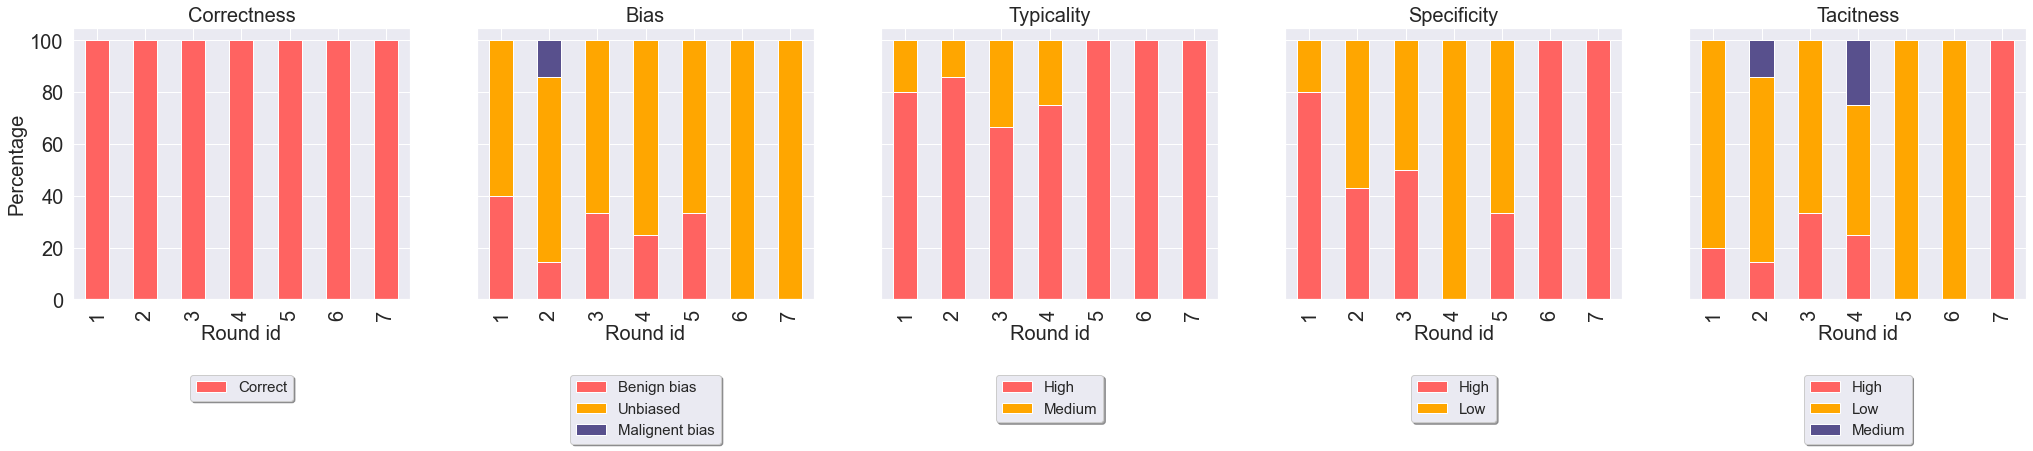

In [1260]:
def create_sub_df(df, column, values_to_keep=[]):
    df_int = df.groupby(["Overall_round_id", column]).agg({"Nb_tuple":"sum"})

    df_int = df_int.reset_index()


    df_int["round_level"]  = df_int["Overall_round_id"].astype(str) 


    df_int["percentage"] = df_int.groupby("round_level")["Nb_tuple"].apply(
         lambda x:  100*x / x.sum()
    )

    if values_to_keep != []:
        df_int = df_int[df_int[column].isin(values_to_keep)]

    df_int["judgement"] = df_int[column]
    df_int["category"] = column
    
    return df_int

df_analysis = df.copy()

common_df = pd.concat(list_to_merge)
df_analysis.rename(columns={"knowledge_piece": "tuple"}, inplace=True)
common_df = df_analysis.merge(common_df, on="tuple")


common_df["Nb_tuple"] = 1
df_int_noise = create_sub_df(common_df, "Noise") #, ["Useful"])
df_int_correct = create_sub_df(common_df, "Correctness")
df_int_bias = create_sub_df(common_df, "Bias")
df_int_typical = create_sub_df(common_df, "Typicality")
df_int_specific = create_sub_df(common_df, "Specificity")
df_int_tacit = create_sub_df(common_df, "Tacitness")

df_to_plot = pd.concat([df_int_noise,df_int_correct,\
    df_int_bias,df_int_typical,df_int_specific,df_int_tacit])



## import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, (len(list(set(list(df_to_plot["category"]))))-1), figsize=(35,5), sharex=True, sharey=True)  
#fig, ax = plt.subplots( figsize=(10,7))  

list_categories = [ "Correctness", "Bias", "Typicality", "Specificity", "Tacitness"] # "Noise",

#df_to_plot["Overall_round_id"] = df_to_plot["Overall_round_id"].apply(lambda x: x if x < 6 else "6+")


            
plt.setp(ax[ 0], ylabel='Percentage')
for i1, game_level in enumerate(["EASY"]):

    df1 = df_to_plot.copy() #[df_to_plot["game_level"] == game_level]
    for index, cat in enumerate(list_categories):
        df_temp = df1[df1["category"] == cat]
        months = df_temp['judgement'].drop_duplicates()
        margin_bottom = np.zeros(len(df_temp['Overall_round_id'].drop_duplicates()))
        colors1 = ["#ff6361", "#ffa600", "#58508d"]
        colors2 = ["#488f31", "#9fa200", "#ffa600"]
        colors = [colors1, colors2]

        pivot_df = df_temp.pivot(index='Overall_round_id', columns='judgement', values='percentage')
        pivot_df.loc[:,months].plot.bar(stacked=True, color=colors[i1], ax=ax[index]).legend(loc='lower left',prop = {'size' : 20})
        ax[index].set_title( cat)
        ax[index].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),
          fancybox=True, shadow=True,prop = {'size' : 15})
        #ax[index].set_xticklabels([1, 2, 3, 4, 5, "6+"], rotation = 0)

        for item in ([ax[index].title,  ax[index].xaxis.label, ax[index].yaxis.label] +
                     ax[index].get_xticklabels() + ax[index].get_yticklabels()):
            item.set_fontsize(20)
plt.setp(ax[:], xlabel='Round id')



plt.subplots_adjust(hspace = 0.3 )
plt.show()

In [1261]:
common_df

,tuple,knowledge_type,knowledge_sign,concept1,concept2,relation,NL_input,game_ID,game_level,round_id,Overall_round_id,asker_id,replier_id,nb_game_session_asker,nb_game_session_replier,turn_time,knowledge category,Noise,Correctness,Sensible - sign,Sensible - relation,Meanings,Bias,Typicality,Specificity,Tacitness,Remarks,Nb_tuple
0,"+ ( closet, UsedFor, storage )",gen.,+,closet,NaN,UsedFor,storage,722,EASY,1,2,227,209,0,1,47.7,gen. +,Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,Low,Low,NaN,1
1,"+ ( closet, UsedFor, storage )",gen.,+,closet,NaN,UsedFor,storage,750,EASY,2,3,251,229,0,1,92.1,gen. +,Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,Low,Low,NaN,1
2,"+ ( closet, UsedFor, storage )",gen.,+,closet,NaN,UsedFor,storage,900,EASY,2,4,283,284,0,0,25.5,gen. +,Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,Low,Low,NaN,1
3,"+ ( closet, UsedFor, storage )",gen.,+,closet,NaN,UsedFor,storage,902,DIFFICULT,3,5,273,28,4,16,91.9,gen. +,Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,Low,Low,NaN,1
4,"+ ( closet, UsedFor, storage )",gen.,+,closet,NaN,UsedFor,storage,902,DIFFICULT,2,4,28,273,16,4,108.0,gen. +,Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,Low,Low,NaN,1
5,"+ ( closet, UsedFor, storage )",gen.,+,closet,NaN,UsedFor,storage,911,DIFFICULT,1,1,283,284,3,3,58.9,gen. +,Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,Low,Low,NaN,1
6,"+ ( door, MadeOf, wood )",gen.,+,door,NaN,MadeOf,wood,722,EASY,2,4,227,209,0,1,157.5,gen. +,Meaningful,Correct,Not Flip,Correct,a single interpretation,Benign bias,Medium,Low,Medium,NaN,1
7,"+ ( door, MadeOf, wood )",gen.,+,door,NaN,MadeOf,wood,837,DIFFICULT,1,2,257,241,4,4,28.9,gen. +,Meaningful,Correct,Not Flip,Correct,a single interpretation,Benign bias,Medium,Low,Medium,NaN,1
8,"- ( door, UsedFor, storage )",gen.,-,door,NaN,UsedFor,storage,722,EASY,1,2,227,209,0,1,47.7,gen. -,Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,High,High,NaN,1
9,"+ ( microwave, UsedFor, cooking food )",gen.,+,microwave,NaN,UsedFor,cooking food,706,EASY,2,3,205,210,3,1,85.5,gen. +,Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,Low,Low,NaN,1


[{'game_id': 266, 'timestampStr': '26-Aug-2021 (14:06:36.667227)'}, {'game_id': 267, 'timestampStr': '26-Aug-2021 (14:11:44.588861)'}, {'game_id': 269, 'timestampStr': '26-Aug-2021 (14:15:16.421013)'}, {'game_id': 270, 'timestampStr': '26-Aug-2021 (14:26:04.808572)'}, {'game_id': 272, 'timestampStr': '26-Aug-2021 (14:33:47.610905)'}, {'game_id': 274, 'timestampStr': '26-Aug-2021 (14:42:44.633805)'}]
[266, 267, 269, 270, 272, 274]
[266, 267, 269, 270, 272, 274]
[{'game_id': 686, 'timestampStr': '03-Oct-2021 (13:52:19.705779)'}, {'game_id': 688, 'timestampStr': '03-Oct-2021 (14:02:30.452360)'}, {'game_id': 693, 'timestampStr': '03-Oct-2021 (14:06:06.769283)'}, {'game_id': 698, 'timestampStr': '03-Oct-2021 (14:09:01.775223)'}, {'game_id': 712, 'timestampStr': '03-Oct-2021 (14:15:17.312341)'}, {'game_id': 726, 'timestampStr': '03-Oct-2021 (14:24:18.907718)'}]
[686, 688, 693, 698, 712, 726]
[686, 688, 693, 698, 712, 726]


/var/folders/j5/fy2cymnx1js4drkm7csc5g740000gn/T/ipykernel_12117/2115483464.py:15: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  df1 = load_dataset("CSQA")


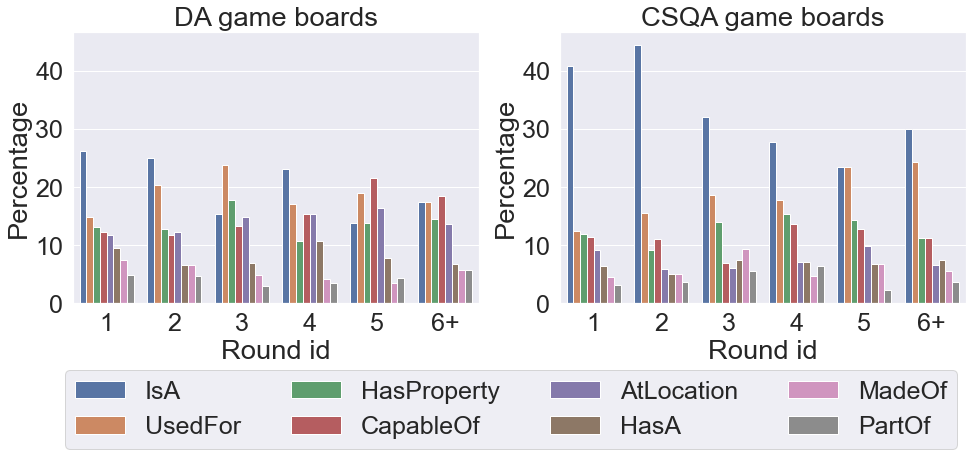

In [1303]:
df = load_dataset("DA")
df_analysis = df.copy()
df_analysis["Overall_round_id"] = df_analysis["Overall_round_id"].apply(lambda x: x if x < 6 else "6+")
df_round = df_analysis[["game_ID", "Overall_round_id", "relation"]].drop_duplicates()
df_round.rename(columns={"percent": "Percentage"}, inplace=True)
df_round.rename(columns={"Overall_round_id": "Round id"}, inplace=True)

###common_df = pd.concat(list_to_merge)
#common_df["Overall_round_id"] = common_df["Overall_round_id"].apply(lambda x: x if x < 6 else "6+")


###df_analysis.rename(columns={"knowledge_piece": "tuple"}, inplace=True)
###common_df = df_analysis.merge(common_df, on="tuple")

df1 = load_dataset("CSQA")
df_analysis1 = df1.copy()
df_analysis1["Overall_round_id"] = df_analysis1["Overall_round_id"].apply(lambda x: x if x < 6 else "6+")
df_round1 = df_analysis1[["game_ID", "Overall_round_id", "relation"]].drop_duplicates()
df_round1.rename(columns={"percent": "Percentage"}, inplace=True)
df_round1.rename(columns={"Overall_round_id": "Round id"}, inplace=True)



x,y = 'Round id', 'relation'
a = (df_round
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percentage')
.reset_index())

x,y = 'Round id', 'relation'
b = (df_round1
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percentage')
.reset_index())

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

sns.set(font_scale=2.28)
#.pipe((sns.catplot,'data'),ax=axes[0], x=x,y='Percentage',hue=y,kind='bar', height=8.27, aspect=11.7/8.27, legend = False))
g = sns.barplot(ax=axes[0], data=a, x=x,y='Percentage',hue=y)#, legend = False)
g.legend_.remove()

axes[0].set_title('DA game boards')#, y=-0.25)
#axes[0].set(xlabel='', ylabel='', xticklabels=["Ease of \n control", "Progress \n feedback", "Audiovisual \n appeal", "Clarity \n of goals", "Challenge"])


g1 = sns.barplot(ax=axes[1], data=b, x=x,y='Percentage',hue=y)#,  legend = False)
g1.legend_.remove()

axes[1].set_title('CSQA game boards')#, y=-0.25)
#axes[1].set(xlabel='', ylabel='', xticklabels=["Ease of \n control", "Progress \n feedback", "Audiovisual \n appeal", "Clarity \n of goals", "Challenge"])


#axes[1].set(xlabel='', ylabel='')
axes[1].tick_params(axis='y', labelleft=True)

#.pipe((sns.catplot,'data'), ax=axes[1], x=x,y='Percentage',hue=y,kind='bar', height=8.27, aspect=11.7/8.27, legend = False))



"""

sns.set(font_scale=2.28)
x,y = 'Round id', 'relation'
(df_round
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percentage')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percentage',hue=y,kind='bar', height=8.27, aspect=11.7/8.27, legend = False))
"""

#plt.xticks(rotation=0)
plt.legend(loc='upper center', bbox_to_anchor=(-0.12, -0.2), prop = {'size' : 25}, ncol=4)





# Study of overall correctness and qualitative properties

In [1161]:
df_overall = common_df.copy()

In [1162]:
df_overall

,tuple,knowledge_type,knowledge_sign,concept1,concept2,relation,NL_input,game_ID,game_level,round_id,Overall_round_id,asker_id,replier_id,nb_game_session_asker,nb_game_session_replier,turn_time,knowledge category,Noise,Correctness,Sensible - sign,Sensible - relation,Meanings,Bias,Typicality,Specificity,Tacitness,Remarks
0,"+ ( cherry, HasProperty, red )",gen.,+,cherry,NaN,HasProperty,red,267,EASY,1,1,45,46,1,3,55.1,gen. +,Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,Low,Low,NaN
1,"+ ( avocado, HasA, yellow color )",gen.,+,avocado,NaN,HasA,yellow color,267,EASY,1,2,46,45,3,1,61.9,gen. +,Meaningful,Correct,Not Flip,Correct,a single interpretation,Benign bias,Low,Low,Low,NaN
2,"- ( avocado, HasProperty, red )",gen.,-,avocado,NaN,HasProperty,red,267,EASY,1,1,45,46,1,3,55.1,gen. -,Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,High,Low,NaN
3,"- ( avocado, HasProperty, yellow )",gen.,-,avocado,NaN,HasProperty,yellow,267,EASY,2,3,45,46,1,3,49.9,gen. -,Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,High,High,NaN
4,"- ( avocado, HasProperty, yellow )",gen.,-,avocado,NaN,HasProperty,yellow,657,DIFFICULT,1,2,127,4,7,24,57.1,gen. -,Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,High,High,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,"- ( eel, HasA, name beginning with c )",gen.,-,eel,NaN,HasA,name beginning with c,656,EASY,2,3,127,4,6,23,31.9,gen. -,Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,High,Low,NaN
4231,"- ( mackerel, HasA, name beginning with c )",gen.,-,mackerel,NaN,HasA,name beginning with c,656,EASY,2,3,127,4,6,23,31.9,gen. -,Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,Medium,Medium,NaN
4232,"- ( salmon, HasA, snake like body )",gen.,-,salmon,NaN,HasA,snake like body,656,EASY,3,5,127,4,6,23,44.8,gen. -,Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,High,Low,NaN
4233,"- ( mackerel, HasA, snake like body )",gen.,-,mackerel,NaN,HasA,snake like body,656,EASY,3,5,127,4,6,23,44.8,gen. -,Meaningful,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,High,High,nice example


In [1163]:
print("Overall noise", len(df_overall[df_overall["Noise"] == "Meaningful"]) *100 / len(df_overall))

df_overall = df_overall[df_overall["Noise"] == "Meaningful"]

print("Overall correctness", len(df_overall[df_overall["Correctness"] == "Correct"]) *100 / len(df_overall))

print("Overall correctness + ", len(df_overall[(df_overall["Correctness"] == "Correct") & (df_overall["knowledge_sign"] == "+")]) *100 / len(df_overall[df_overall["knowledge_sign"] == "+"]))

print("Overall correctness - ", len(df_overall[(df_overall["Correctness"] == "Correct") & (df_overall["knowledge_sign"] == "-")]) *100 / len(df_overall[df_overall["knowledge_sign"] == "-"]))



df_incorrect = df_overall[df_overall["Correctness"] == "Incorrect"]
print("Overall flip sign", len(df_incorrect[(df_incorrect["Sensible - sign"] == "Flip") & (df_incorrect["Sensible - relation"] == "Correct")]) *100 / len(df_incorrect))
print("Overall relation", len(df_incorrect[(df_incorrect["Sensible - relation"] == "Incorrect") & (df_incorrect["Sensible - sign"] == "Not Flip")]) *100 / len(df_incorrect))

print("Overall relation +", len(df_incorrect[(df_incorrect["Sensible - relation"] == "Incorrect") & (df_incorrect["Sensible - sign"] == "Not Flip") & (df_incorrect["knowledge_sign"] == "+")]) *100 / len(df_incorrect[(df_incorrect["Sensible - relation"] == "Incorrect")]))

print("Overall relation -", len(df_incorrect[(df_incorrect["Sensible - relation"] == "Incorrect") & (df_incorrect["Sensible - sign"] == "Not Flip") & (df_incorrect["knowledge_sign"] == "-")]) *100 / len(df_incorrect[(df_incorrect["Sensible - relation"] == "Incorrect")]))




print("Overall relation + sign", len(df_incorrect[(df_incorrect["Sensible - relation"] == "Incorrect") & (df_incorrect["Sensible - sign"] == "Flip")]) *100 / len(df_incorrect))


#print(list(df_incorrect["tuple"]))


print("Overall bias", len(df_overall[df_overall["Bias"] == "Unbiased"]) *100 / len(df_overall))
print("Overall tacit", len(df_overall[df_overall["Tacitness"] == "High"]) *100 / len(df_overall))
print("Overall tacit", len(df_overall[df_overall["Tacitness"] == "Medium"]) *100 / len(df_overall))
print("Overall specificity", len(df_overall[df_overall["Specificity"] == "High"]) *100 / len(df_overall))
print("Overall specificity", len(df_overall[df_overall["Specificity"] == "Medium"]) *100 / len(df_overall))
print("Overall typicality", len(df_overall[df_overall["Typicality"] == "Low"]) *100 / len(df_overall))
print("Overall typicality", len(df_overall[df_overall["Typicality"] == "Medium"]) *100 / len(df_overall))




df_game_round = df_overall.drop_duplicates(subset=["game_ID", "Overall_round_id"])
for rel in list(set(list(df_overall["relation"]))):
    print(rel, len(df_game_round[df_game_round["relation"] == rel]) *100/ len(df_game_round))


Overall noise 95.5608028335301
Overall correctness 90.61032863849765
Overall correctness +  88.84143085958355
Overall correctness -  92.13431462741491
Overall flip sign 62.29946524064171
Overall relation 29.946524064171122
Overall relation + 47.142857142857146
Overall relation - 32.857142857142854
Overall relation + sign 7.4866310160427805
Overall bias 86.28613787991104
Overall tacit 38.349394613293796
Overall tacit 21.324437855201385
Overall specificity 59.47615517667408
Overall specificity 16.85198912774895
Overall typicality 1.2849023968371633
Overall typicality 6.696318260439832
UsedFor 13.823529411764707
AtLocation 7.205882352941177
HasA 20.0
CapableOf 13.529411764705882
MadeOf 4.5588235294117645
HasProperty 13.382352941176471
PartOf 6.323529411764706
IsA 21.176470588235293


## Utility over quality -DA dataset

In [1164]:
df_analysis = df.copy()

df_analysis.rename(columns={"knowledge_piece": "tuple"}, inplace=True)
df_analysis = df_analysis.merge(common_df[["tuple", "Tacitness", "Specificity", "Typicality", "Bias"]], on="tuple")

df_analysis=df_analysis[(df_analysis["Tacitness"] == "High") | (df_analysis["Tacitness"] == "Medium") | \
                       (df_analysis["Specificity"] == "High") | (df_analysis["Specificity"] == "Medium") |\
                       ((df_analysis["Typicality"] == "Low") & (df_analysis["Bias"] == "Unbiased")) | (df_analysis["Typicality"] == "Medium")]



df_analysis["overall_round_id"] = df_analysis["Overall_round_id"]
df_analysis["Overall_round_id"] = df_analysis["Overall_round_id"].apply(lambda x: x if x<=5 else 6)
df_analysis


df_throughput_simple = df_analysis.groupby(["game_ID",  "game_level", "Overall_round_id"]).size().reset_index(name = "Collected knowledge")
print(len(df_throughput))
df_temp = df[["turn_time", "game_ID","game_level", "Overall_round_id"]].drop_duplicates(subset=["game_ID", "game_level", "Overall_round_id"])
print(df_temp)
df_throughput_simple = df_throughput_simple.merge(df_temp, on=["game_ID", "game_level", "Overall_round_id"], how='left')
print(len(df_throughput_simple))

df_throughput_simple["turn_throughput"] = df_throughput_simple.apply(lambda x: x["Collected knowledge"] / x["turn_time"], axis=1)




df_round_game = df_throughput_simple.groupby(["game_ID", "game_level", "Overall_round_id"]).sum().reset_index()#.size().reset_index(name = "Collected knowledge")
df_analysis["list_players"] = df_analysis.apply(lambda x: set([x["asker_id"], x["replier_id"]]), axis=1)
temp =df_analysis[["game_ID", "list_players"]].drop_duplicates(subset=["game_ID"])
df_round_game = df_round_game.merge(temp, on="game_ID", how="left")

df_game_time = df_analysis.groupby(["game_ID"])["turn_time"].sum().reset_index()
df_game_time = df_game_time.merge(df_analysis.groupby(["game_ID"])["Overall_round_id"].max().reset_index(), on="game_ID")


#print(len(set(list(df_analysis["asker_id"]))), len(set(list(df_analysis["replier_id"]))))
df_players = pd.concat([df_analysis[["asker_id", "game_ID"]].rename(columns={"asker_id":"player_id"}),\
                       df_analysis[["replier_id", "game_ID"]].rename(columns={"replier_id":"player_id"})], axis=0)

df_players = df_players.groupby(["player_id"])["game_ID"].apply((set)).reset_index()
df_players["game_ID"] = df_players.apply(lambda x: list(x["game_ID"]), axis=1)
#df_players["total_nb_games"] = df_players.apply(lambda x: len(x["game_ID"]), axis=1)
df_players["total_nb_games"] = df_players.apply(lambda x: len(x["game_ID"]) if len(x["game_ID"]) <20 else 5, axis=1)
df_players["game_time"] = df_players.apply(lambda x: [df_game_time[df_game_time["game_ID"] == elem]["turn_time"].values[0] for elem in x["game_ID"]], axis=1)


#df_players["total_nb_games"].value_counts()
#df_players = df_players[df_players["total_nb_games"] <20]
#df_players["total_nb_games"].value_counts()
df_players["cost_per_game_simple_count"] = df_players.apply(lambda x: 2.5 / x["total_nb_games"], axis=1)
df_players["cost_per_game_time_proportional"] = \
    df_players.apply(lambda x: [2.5 * elem / sum(x["game_time"]) for elem in x["game_time"]], axis=1)
df_players["cost_per_game_time_proportional_dict"] = \
    df_players.apply(lambda x: {id_g: 2.5 * elem / sum(x["game_time"]) for id_g, elem in zip(x["game_ID"],x["game_time"])}, axis=1)

df_round_game["cost_specific_game_simple_count"] = df_round_game.apply(lambda x: \
            df_players[df_players["player_id"] == list(x["list_players"])[0]]["cost_per_game_simple_count"].values[0] + \
             df_players[df_players["player_id"] == list(x["list_players"])[1]]["cost_per_game_simple_count"].values[0]   , axis=1)

df_round_game["cost_specific_game_time_proportional"] = df_round_game.apply(lambda x: \
            df_players[df_players["player_id"] == list(x["list_players"])[0]]["cost_per_game_time_proportional_dict"].values[0][x["game_ID"]] + \
             df_players[df_players["player_id"] == list(x["list_players"])[1]]["cost_per_game_time_proportional_dict"].values[0][x["game_ID"]]   , axis=1)

df_round_game["round_cost_specific_game_time_proportional"] = df_round_game.apply(lambda x: x["cost_specific_game_time_proportional"] / df_game_time[df_game_time["game_ID"] == x["game_ID"]]["Overall_round_id"].values[0], axis=1)

df_round_game["utility"] = df_round_game.apply(lambda x:x["turn_throughput"] / x["round_cost_specific_game_time_proportional"], axis=1)
print(len(df_round_game))
df_round_game = df_round_game[abs(df_round_game["utility"] - statistics.mean(list(df_round_game["utility"])) ) < 5* statistics.stdev(list(df_round_game["utility"]))]
print(len(df_round_game))


df_round_game["Normalized utility"] = df_round_game.apply(lambda x: x["utility"] / max(list(df_round_game["utility"])) * 100 , axis=1)

3669
       turn_time  game_ID game_level  Overall_round_id
0           55.1      267       EASY                 1
4           49.9      267       EASY                 3
6           61.9      267       EASY                 2
108        386.0      268       EASY                 1
112        288.4      268       EASY                 3
...          ...      ...        ...               ...
74709       31.1      657  DIFFICULT                 5
74712       44.1      657  DIFFICULT                 7
74714       57.1      657  DIFFICULT                 2
74717       85.1      657  DIFFICULT                 4
74728       45.2      657  DIFFICULT                 6

[1051 rows x 4 columns]
627
627
621


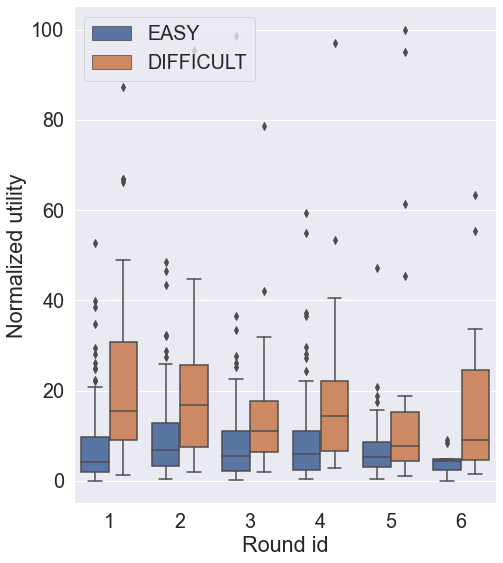

In [1165]:
sns.set(font_scale=1.8)

#df_round_game["Overall_round_id"] = df_round_game["Overall_round_id"].apply(lambda x: x if x < 6 else "6 and over")
df_round_game.rename(columns={"Overall_round_id": "Round id", "game_level": "Game level"}, inplace=True)
g = sns.catplot(x="Round id", y="Normalized utility",  hue="Game level", aspect=.9,  kind="box",data=df_round_game,\
               height=8.27,legend_out=False)#col="Overall_round_id", col_wrap=6,
                


plt.legend(loc='upper left')



## Utility over quality - CSQA dataset

In [1166]:
relevance_df = pd.read_csv("relevance_labeling.csv")

# Get nly unique relevant candidate statements

relevance_df = relevance_df[relevance_df["relevant"] == "Yes"].drop_duplicates(subset=["candidate_statement"])

In [1167]:
relevance_df

,ID,question,concept,candidate_statement,SimCSE_score,relevant,correct
0,24eebfa678112100803da16dde148b2d|A|c|0,Where would you put a container can after you ...,pantry,pantry can store things,0.5914,Yes,Yes
1,24eebfa678112100803da16dde148b2d|A|c|1,Where would you put a container can after you ...,pantry,pantry can be used for storage,0.5741,Yes,Yes
2,24eebfa678112100803da16dde148b2d|A|c|2,Where would you put a container can after you ...,pantry,pantry can be used for storing things in,0.5741,Yes,Yes
4,24eebfa678112100803da16dde148b2d|A|c|4,Where would you put a container can after you ...,pantry,pantry have (a) store edible items,0.5166,Yes,Yes
9,24eebfa678112100803da16dde148b2d|E|c|0,Where would you put a container can after you ...,garage,garage is a place to store items,0.6174,Yes,Yes
...,...,...,...,...,...,...,...
3432,808f26b61b3e3517a8f41938ebf0ede0|E|c|1,where are people likely to be joyous?,church,church is a place to be entertained,0.7081,Yes,Yes
3449,2a3916bb1c124db90a862aa895047ab8|D|c|3,"To learn something new, what is something an a...",classroom,classroom is a necessity for education,0.5672,Yes,Yes
3459,15f1ca9b09bcc6314e67e9bb4161c3ec|B|c|3,"Where would there be few or no people, regarle...",forest,forest is not related to water falling,0.5209,Yes,Yes
3460,15f1ca9b09bcc6314e67e9bb4161c3ec|B|c|4,"Where would there be few or no people, regarle...",forest,forest is not a popular attraction,0.5136,Yes,Yes


In [1168]:
df_analysis = df.copy()
print(len(df_analysis))
df_analysis.rename(columns={"knowledge_piece": "tuple"}, inplace=True)
df_analysis = df_analysis[df_analysis["knowledge_type"] == "gen."]




positive_templates = {
	'IsA': '{} is a {}',
	'HasA': '{} have (a) {}',
	'HasProperty': '{} is {}',
	'UsedFor': '{} can be used for {}',
	'CapableOf': '{} can {}',
	'MadeOf': '{} is made of {}',
	'PartOf': '{} is part of (a) {}',
	'AtLocation': '{} can be found {}',
}

negative_templates = {
	'IsA': '{} is not a {}',
	'HasA': '{} does not have (a) {}',
	'HasProperty': '{} is not {}',
	'UsedFor': '{} can not be used for {}',
	'CapableOf': '{} can not {}',
	'MadeOf': '{} is not made of {}',
	'PartOf': '{} is not part of (a) {}',
	'AtLocation': '{} can not be found {}',
}

def tuple_to_statement(x):
    if x["knowledge_sign"] == "+":
        return positive_templates[x["relation"]].format(x["concept1"], x["NL_input"])
    elif x["knowledge_sign"] == "-":
        return negative_templates[x["relation"]].format(x["concept1"], x["NL_input"])


df_analysis["candidate_statement"] = df_analysis.apply(lambda x: tuple_to_statement(x), axis=1)
df_analysis = relevance_df[["candidate_statement"]].merge(df_analysis[["asker_id", "replier_id", "turn_time", "game_level", "tuple", "candidate_statement", "Overall_round_id", "game_ID"]], on="candidate_statement")

print(len(df_analysis))



75491
9


In [1169]:
df_analysis

,candidate_statement,asker_id,replier_id,turn_time,game_level,tuple,Overall_round_id,game_ID
0,ceiling is part of (a) house,4,76,90.5,DIFFICULT,"+ ( ceiling, PartOf, house )",3,357
1,ceiling is part of (a) house,132,59,88.8,DIFFICULT,"+ ( ceiling, PartOf, house )",2,553
2,cupboard can be used for storage,59,87,143.4,EASY,"+ ( cupboard, UsedFor, storage )",1,359
3,cupboard can be used for storage,157,160,41.6,DIFFICULT,"+ ( cupboard, UsedFor, storage )",5,621
4,closet can be used for storage,157,160,41.6,DIFFICULT,"+ ( closet, UsedFor, storage )",5,621
5,church is a place of worship,142,143,51.9,DIFFICULT,"+ ( church, IsA, place of worship )",7,576
6,airplane can fly,97,100,48.9,EASY,"+ ( airplane, CapableOf, fly )",4,424
7,airplane can fly,124,127,68.5,EASY,"+ ( airplane, CapableOf, fly )",1,506
8,roof can be found on top of a house,142,149,41.4,EASY,"+ ( roof, AtLocation, on top of a house )",4,564


In [1170]:

df_analysis["overall_round_id"] = df_analysis["Overall_round_id"]
df_analysis["Overall_round_id"] = df_analysis["Overall_round_id"].apply(lambda x: x if x<=5 else 6)
df_analysis


df_throughput_simple = df_analysis.groupby(["game_ID",  "game_level", "Overall_round_id"]).size().reset_index(name = "Collected knowledge")
print(len(df_throughput))
df_temp = df[["turn_time", "game_ID","game_level", "Overall_round_id"]].drop_duplicates(subset=["game_ID", "game_level", "Overall_round_id"])
print(df_temp)
df_throughput_simple = df_throughput_simple.merge(df_temp, on=["game_ID", "game_level", "Overall_round_id"], how='left')
print(len(df_throughput_simple))

df_throughput_simple["turn_throughput"] = df_throughput_simple.apply(lambda x: x["Collected knowledge"] / x["turn_time"], axis=1)




df_round_game = df_throughput_simple.groupby(["game_ID", "game_level", "Overall_round_id"]).sum().reset_index()#.size().reset_index(name = "Collected knowledge")
df_analysis["list_players"] = df_analysis.apply(lambda x: set([x["asker_id"], x["replier_id"]]), axis=1)
temp =df_analysis[["game_ID", "list_players"]].drop_duplicates(subset=["game_ID"])
df_round_game = df_round_game.merge(temp, on="game_ID", how="left")

df_game_time = df_analysis.groupby(["game_ID"])["turn_time"].sum().reset_index()
df_game_time = df_game_time.merge(df_analysis.groupby(["game_ID"])["Overall_round_id"].max().reset_index(), on="game_ID")


#print(len(set(list(df_analysis["asker_id"]))), len(set(list(df_analysis["replier_id"]))))
df_players = pd.concat([df_analysis[["asker_id", "game_ID"]].rename(columns={"asker_id":"player_id"}),\
                       df_analysis[["replier_id", "game_ID"]].rename(columns={"replier_id":"player_id"})], axis=0)

df_players = df_players.groupby(["player_id"])["game_ID"].apply((set)).reset_index()
df_players["game_ID"] = df_players.apply(lambda x: list(x["game_ID"]), axis=1)
#df_players["total_nb_games"] = df_players.apply(lambda x: len(x["game_ID"]), axis=1)
df_players["total_nb_games"] = df_players.apply(lambda x: len(x["game_ID"]) if len(x["game_ID"]) <20 else 5, axis=1)
df_players["game_time"] = df_players.apply(lambda x: [df_game_time[df_game_time["game_ID"] == elem]["turn_time"].values[0] for elem in x["game_ID"]], axis=1)


#df_players["total_nb_games"].value_counts()
#df_players = df_players[df_players["total_nb_games"] <20]
#df_players["total_nb_games"].value_counts()
df_players["cost_per_game_simple_count"] = df_players.apply(lambda x: 2.5 / x["total_nb_games"], axis=1)
df_players["cost_per_game_time_proportional"] = \
    df_players.apply(lambda x: [2.5 * elem / sum(x["game_time"]) for elem in x["game_time"]], axis=1)
df_players["cost_per_game_time_proportional_dict"] = \
    df_players.apply(lambda x: {id_g: 2.5 * elem / sum(x["game_time"]) for id_g, elem in zip(x["game_ID"],x["game_time"])}, axis=1)

df_round_game["cost_specific_game_simple_count"] = df_round_game.apply(lambda x: \
            df_players[df_players["player_id"] == list(x["list_players"])[0]]["cost_per_game_simple_count"].values[0] + \
             df_players[df_players["player_id"] == list(x["list_players"])[1]]["cost_per_game_simple_count"].values[0]   , axis=1)

df_round_game["cost_specific_game_time_proportional"] = df_round_game.apply(lambda x: \
            df_players[df_players["player_id"] == list(x["list_players"])[0]]["cost_per_game_time_proportional_dict"].values[0][x["game_ID"]] + \
             df_players[df_players["player_id"] == list(x["list_players"])[1]]["cost_per_game_time_proportional_dict"].values[0][x["game_ID"]]   , axis=1)

df_round_game["round_cost_specific_game_time_proportional"] = df_round_game.apply(lambda x: x["cost_specific_game_time_proportional"] / df_game_time[df_game_time["game_ID"] == x["game_ID"]]["Overall_round_id"].values[0], axis=1)

df_round_game["utility"] = df_round_game.apply(lambda x:x["turn_throughput"] / x["round_cost_specific_game_time_proportional"], axis=1)
print(len(df_round_game))
df_round_game = df_round_game[abs(df_round_game["utility"] - statistics.mean(list(df_round_game["utility"])) ) < 5* statistics.stdev(list(df_round_game["utility"]))]
print(len(df_round_game))


df_round_game["Normalized utility"] = df_round_game.apply(lambda x: x["utility"] / max(list(df_round_game["utility"])) * 100 , axis=1)

3669
       turn_time  game_ID game_level  Overall_round_id
0           55.1      267       EASY                 1
4           49.9      267       EASY                 3
6           61.9      267       EASY                 2
108        386.0      268       EASY                 1
112        288.4      268       EASY                 3
...          ...      ...        ...               ...
74709       31.1      657  DIFFICULT                 5
74712       44.1      657  DIFFICULT                 7
74714       57.1      657  DIFFICULT                 2
74717       85.1      657  DIFFICULT                 4
74728       45.2      657  DIFFICULT                 6

[1051 rows x 4 columns]
8
8
8


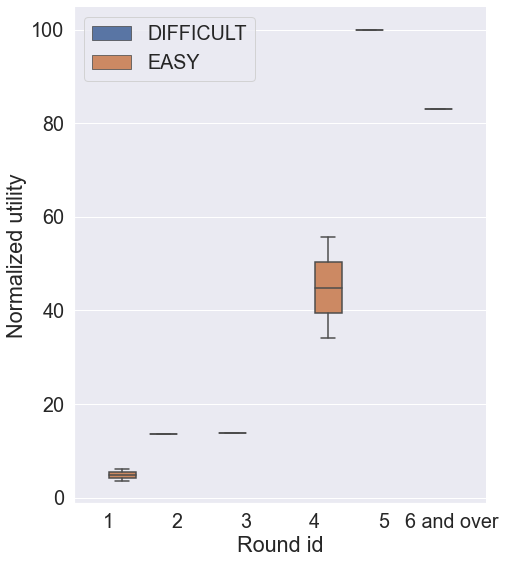

In [1171]:
sns.set(font_scale=1.8)

df_round_game["Overall_round_id"] = df_round_game["Overall_round_id"].apply(lambda x: x if x < 6 else "6 and over")
df_round_game.rename(columns={"Overall_round_id": "Round id", "game_level": "Game level"}, inplace=True)
g = sns.catplot(x="Round id", order=[1, 2, 3, 4, 5, "6 and over"], y="Normalized utility",  hue="Game level", aspect=.9,  kind="box",data=df_round_game,\
               height=8.27, legend_out=False)#col="Overall_round_id", col_wrap=6,
plt.legend(loc='upper left')



In [1172]:
#df_round_game[["Round id",  "Game level"]].value_counts()

In [1173]:
df

,knowledge_piece,knowledge_type,knowledge_sign,concept1,concept2,relation,NL_input,game_ID,game_level,round_id,Overall_round_id,asker_id,replier_id,nb_game_session_asker,nb_game_session_replier,turn_time,knowledge category
0,"+ ( grapefruit, HasProperty, red )",gen.,+,grapefruit,NaN,HasProperty,red,267,EASY,1,1,45,46,1,3,55.1,gen. +
1,"+ ( raspberry, HasProperty, red )",gen.,+,raspberry,NaN,HasProperty,red,267,EASY,1,1,45,46,1,3,55.1,gen. +
2,"+ ( cherry, HasProperty, red )",gen.,+,cherry,NaN,HasProperty,red,267,EASY,1,1,45,46,1,3,55.1,gen. +
3,"+ ( plum, HasProperty, red )",gen.,+,plum,NaN,HasProperty,red,267,EASY,1,1,45,46,1,3,55.1,gen. +
4,"+ ( banana, HasProperty, yellow )",gen.,+,banana,NaN,HasProperty,yellow,267,EASY,2,3,45,46,1,3,49.9,gen. +
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75486,"- ( plum, orange, HasA, edible skin )",discr.,-,plum,orange,HasA,edible skin,657,DIFFICULT,3,6,127,4,7,24,45.2,discr. -
75487,"- ( plum, cherry, HasA, edible skin )",discr.,-,plum,cherry,HasA,edible skin,657,DIFFICULT,3,6,127,4,7,24,45.2,discr. -
75488,"- ( plum, pear, HasA, edible skin )",discr.,-,plum,pear,HasA,edible skin,657,DIFFICULT,3,6,127,4,7,24,45.2,discr. -
75489,"- ( plum, grapefruit, HasA, edible skin )",discr.,-,plum,grapefruit,HasA,edible skin,657,DIFFICULT,3,6,127,4,7,24,45.2,discr. -


# Player experience

In [1201]:
import json

pd_exp = pd.read_json("UserInfo.json")
pd_exp["exit_questionnaire"] = pd_exp["exit_questionnaire"].apply(lambda x: json.loads(x))
#print(type(pd_exp["exit_questionnaire"].values[0]))
pd_exp = pd_exp.drop('exit_questionnaire', 1).assign(**pd.DataFrame(pd_exp["exit_questionnaire"].values.tolist()))
#df.drop('E', 1).assign(**pd.DataFrame(df.E.values.tolist()))
#pd_exp.exit_questionnaire.apply(pd.Series)


"""
pd_exp["Immersion"] = pd_exp.apply(lambda x: sum([x["IMM_1"]+4, x["IMM_2"]+4, x["IMM_3"]+4])/3 -4 , axis=1)
pd_exp["Goals & rules"] = pd_exp.apply(lambda x: sum([x["GR_1"]+4, x["GR_2"]+4, x["GR_3"]+4])/3 -4, axis=1)
pd_exp["Curiosity"] = pd_exp.apply(lambda x: sum([x["CUR_1"]+4, x["CUR_2"]+4, x["CUR_3"]+4])/3 -4, axis=1)
pd_exp["Audiovisual appeal"] = pd_exp.apply(lambda x: sum([x["AA_1"]+4, x["AA_2"]+4, x["AA_3"]+4])/3 -4, axis=1)
pd_exp["Autonomy"] = pd_exp.apply(lambda x: sum([x["AUT_1"]+4, x["AUT_2"]+4, x["AUT_3"]+4])/3 -4, axis=1)
pd_exp["Challenge"] = pd_exp.apply(lambda x: sum([x["CH_1"]+4, x["CH_2"]+4, x["CH_3"]+4])/3 -4, axis=1)
pd_exp["Ease of control"] = pd_exp.apply(lambda x: sum([x["EC_1"]+4, x["EC_2"]+4, x["EC_3"]+4])/3 -4, axis=1)
pd_exp["Mastery"] = pd_exp.apply(lambda x: sum([x["MAS_1"]+4, x["MAS_2"]+4, x["MAS_3"]+4])/3 -4, axis=1)
pd_exp["Progress feedback"] = pd_exp.apply(lambda x: sum([x["PF_1"]+4, x["PF_2"]+4, x["PF_3"]+4])/3 -4, axis=1)
pd_exp["Meaning"] = pd_exp.apply(lambda x: sum([x["MEA_1"]+4, x["MEA_2"]+4, x["MEA_3"]+4])/3 -4, axis=1)
"""


pd_exp["Immersion"] = pd_exp.apply(lambda x: sum([x["IMM_1"], x["IMM_2"], x["IMM_3"]])/3 , axis=1)
pd_exp["Clarity of goals"] = pd_exp.apply(lambda x: sum([x["GR_1"], x["GR_2"], x["GR_3"]])/3 , axis=1)
pd_exp["Curiosity"] = pd_exp.apply(lambda x: sum([x["CUR_1"], x["CUR_2"], x["CUR_3"]])/3 , axis=1)
pd_exp["Audiovisual appeal"] = pd_exp.apply(lambda x: sum([x["AA_1"], x["AA_2"], x["AA_3"]])/3 , axis=1)
pd_exp["Autonomy"] = pd_exp.apply(lambda x: sum([x["AUT_1"], x["AUT_2"], x["AUT_3"]])/3 , axis=1)
pd_exp["Challenge"] = pd_exp.apply(lambda x: sum([x["CH_1"], x["CH_2"], x["CH_3"]])/3 , axis=1)
pd_exp["Ease of control"] = pd_exp.apply(lambda x: sum([x["EC_1"], x["EC_2"], x["EC_3"]])/3, axis=1)
pd_exp["Mastery"] = pd_exp.apply(lambda x: sum([x["MAS_1"], x["MAS_2"], x["MAS_3"]])/3, axis=1)
pd_exp["Progress feedback"] = pd_exp.apply(lambda x: sum([x["PF_1"], x["PF_2"], x["PF_3"]])/3, axis=1)
pd_exp["Meaning"] = pd_exp.apply(lambda x: sum([x["MEA_1"], x["MEA_2"], x["MEA_3"]])/3, axis=1)


/var/folders/j5/fy2cymnx1js4drkm7csc5g740000gn/T/ipykernel_12117/772653419.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  pd_exp = pd_exp.drop('exit_questionnaire', 1).assign(**pd.DataFrame(pd_exp["exit_questionnaire"].values.tolist()))


<AxesSubplot:xlabel='variable', ylabel='value'>

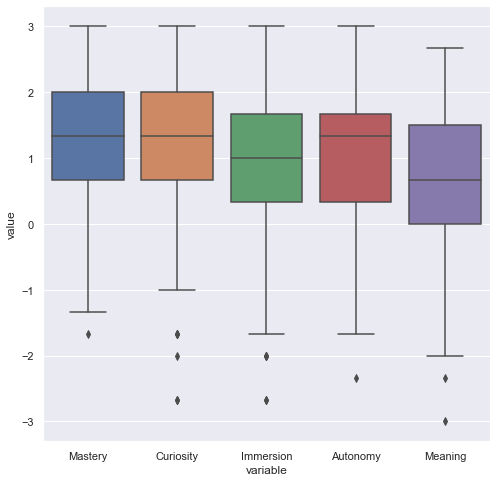

In [1202]:
sns.set(rc={'figure.figsize':(8,8)})


sns.boxplot(x="variable", y="value", data=pd.melt(pd_exp[["Mastery", "Curiosity", "Immersion", "Autonomy", "Meaning"]]))


<AxesSubplot:xlabel='variable', ylabel='value'>

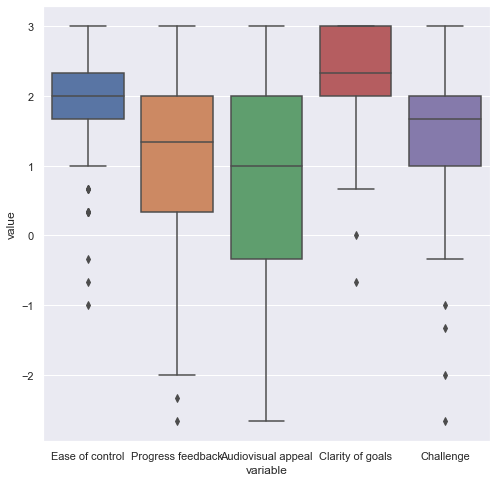

In [1203]:

sns.set(rc={'figure.figsize':(8,8)})


sns.boxplot(x="variable", y="value", data=pd.melt(pd_exp[["Ease of control", "Progress feedback", "Audiovisual appeal", "Clarity of goals", "Challenge"]]))



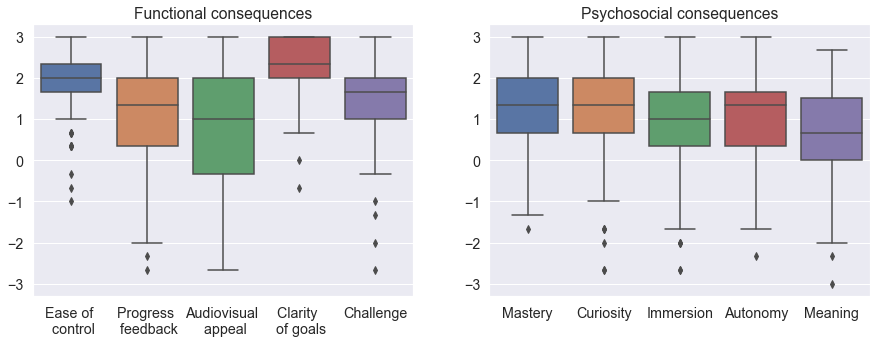

In [1234]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#fig.suptitle('Initial Pokemon - 1st Generation')


sns.set(rc={'figure.figsize':(8,8)})
sns.set(font_scale=1.3)



# Bulbasaur
sns.boxplot(ax=axes[0], x="variable", y="value", data=pd.melt(pd_exp[["Ease of control", "Progress feedback", "Audiovisual appeal", "Clarity of goals", "Challenge"]]))

axes[0].set_title('Functional consequences')#, y=-0.25)
axes[0].set(xlabel='', ylabel='', xticklabels=["Ease of \n control", "Progress \n feedback", "Audiovisual \n appeal", "Clarity \n of goals", "Challenge"])



a = sns.boxplot(ax=axes[1],x="variable", y="value", data=pd.melt(pd_exp[["Mastery", "Curiosity", "Immersion", "Autonomy", "Meaning"]]))
axes[1].set_title("Psychosocial consequences") #, y=-0.25)
axes[1].set(xlabel='', ylabel='')

axes[1].tick_params(axis='y', labelleft=True)
